# C3RO demographics analysis statistics code

Perform exploratory analysis and specific statistical analysis for manuscript.

Uses CSV files from Base_file_generation.ipynb code.

Author: Kareem A. Wahid.

Last edited by Kareem Wahid on August, 23, 2022.

## Table of contents

1. [Initial exploratory analysis](#explore)

3. [Direct comparison barplots](#barplot)
   
5. [Bayesian regression analysis](#regression)

In [1]:
# dependencies

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.colors as mcolors

import math

import seaborn as sns

import bambi as bmb # pip install bambi
import arviz as az

import warnings
warnings.filterwarnings('ignore') # some irrelevant pandas copyset warnings that I suppressed to make the notebook cleaner 

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Initial exploratory analysis <a class="anchor" id="explore"></a>

Includes correlations between variables and overall descriptive stats.

Breast
(94, 35)
unique obervers 94


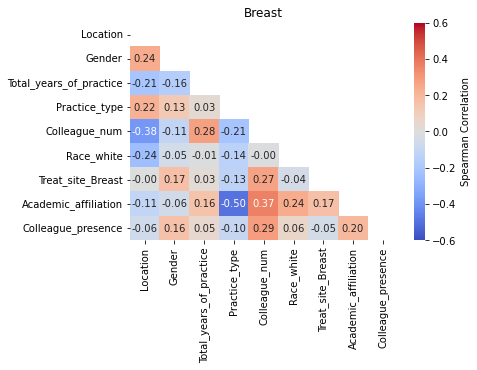

                                     Median  25th Percentile (Q1)  \
Numerical   Total_years_of_practice     6.0                   3.0   
            Colleague_num               5.0                   2.0   
Categorical Location                    NaN                   NaN   
            Gender                      NaN                   NaN   
            Practice_type               NaN                   NaN   
            Race_white                  NaN                   NaN   
            Treat_site_Breast           NaN                   NaN   
            Academic_affiliation        NaN                   NaN   
            Colleague_presence          NaN                   NaN   

                                     75th Percentile (Q3)  Academic   Checked  \
Numerical   Total_years_of_practice                  10.0       NaN       NaN   
            Colleague_num                            11.0       NaN       NaN   
Categorical Location                                  NaN       Na

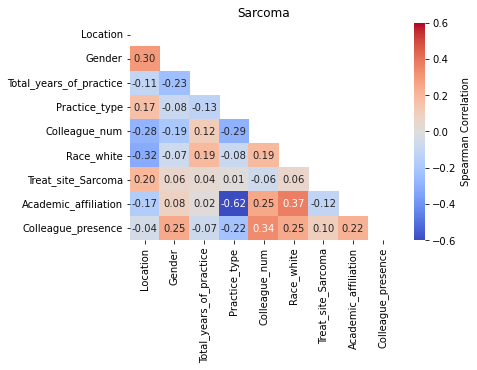

                                     Median  25th Percentile (Q1)  \
Numerical   Total_years_of_practice     7.0                   3.0   
            Colleague_num               4.0                   2.0   
Categorical Location                    NaN                   NaN   
            Gender                      NaN                   NaN   
            Practice_type               NaN                   NaN   
            Race_white                  NaN                   NaN   
            Treat_site_Sarcoma          NaN                   NaN   
            Academic_affiliation        NaN                   NaN   
            Colleague_presence          NaN                   NaN   

                                     75th Percentile (Q3)  Academic   Checked  \
Numerical   Total_years_of_practice                  11.5       NaN       NaN   
            Colleague_num                            10.0       NaN       NaN   
Categorical Location                                  NaN       Na

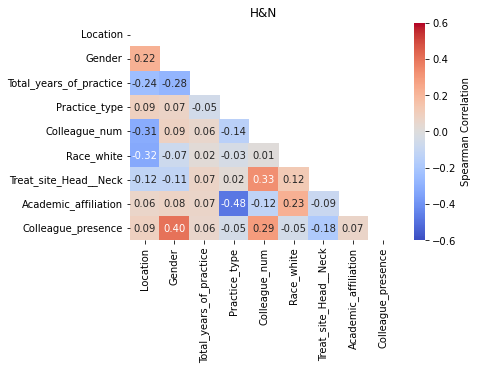

                                     Median  25th Percentile (Q1)  \
Numerical   Total_years_of_practice     6.5                  2.25   
            Colleague_num               5.0                  2.00   
Categorical Location                    NaN                   NaN   
            Gender                      NaN                   NaN   
            Practice_type               NaN                   NaN   
            Race_white                  NaN                   NaN   
            Treat_site_Head__Neck       NaN                   NaN   
            Academic_affiliation        NaN                   NaN   
            Colleague_presence          NaN                   NaN   

                                     75th Percentile (Q3)  Academic  Checked  \
Numerical   Total_years_of_practice                  11.0       NaN      NaN   
            Colleague_num                            10.0       NaN      NaN   
Categorical Location                                  NaN       NaN  

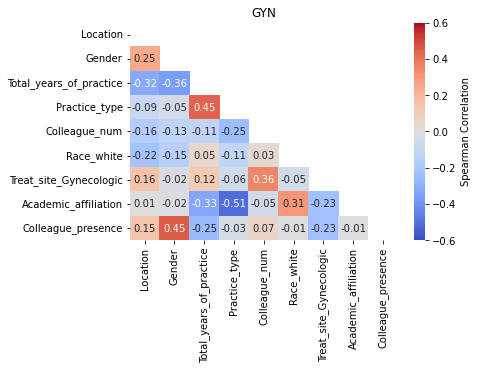

                                     Median  25th Percentile (Q1)  \
Numerical   Total_years_of_practice     6.5                   4.0   
            Colleague_num               5.0                   2.0   
Categorical Location                    NaN                   NaN   
            Gender                      NaN                   NaN   
            Practice_type               NaN                   NaN   
            Race_white                  NaN                   NaN   
            Treat_site_Gynecologic      NaN                   NaN   
            Academic_affiliation        NaN                   NaN   
            Colleague_presence          NaN                   NaN   

                                     75th Percentile (Q3)  Academic  Checked  \
Numerical   Total_years_of_practice                 12.50       NaN      NaN   
            Colleague_num                           10.25       NaN      NaN   
Categorical Location                                  NaN       NaN  

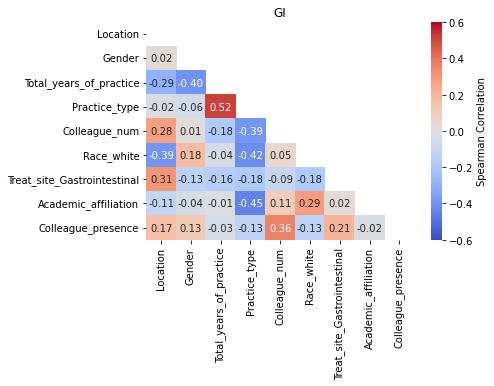

                                         Median  25th Percentile (Q1)  \
Numerical   Total_years_of_practice         8.5                   4.0   
            Colleague_num                   4.0                   2.0   
Categorical Location                        NaN                   NaN   
            Gender                          NaN                   NaN   
            Practice_type                   NaN                   NaN   
            Race_white                      NaN                   NaN   
            Treat_site_Gastrointestinal     NaN                   NaN   
            Academic_affiliation            NaN                   NaN   
            Colleague_presence              NaN                   NaN   

                                         75th Percentile (Q3)  Academic  \
Numerical   Total_years_of_practice                     15.25       NaN   
            Colleague_num                               10.00       NaN   
Categorical Location                        

In [2]:
%%time

csv_path = 'csv_files'

site_list = [
    'Breast', 
    'Sarcoma', 
    'H&N', 
    'GYN', 
    'GI',
                ] 

for site in site_list:
    print(site)

    site_df = pd.read_csv(os.path.join(csv_path, site+'.csv')) # path to csv files generated from previous notebook

    ### DATA PROCESSING

    # make dataframe only 1 row per observer 
    site_df = site_df.drop_duplicates(subset='Record_ID', keep='first')

    # transform academic variable to binary
    site_df['Practice_type'] = np.where(site_df['Practice_type'] == 'Academic/university', 'Academic', 'Non-academic')

    # remove unecessary columns
    remove_columns = [
        'Why_are_you_interested_in_participating_in_this_challenge__Select_all_that_apply_choiceOpportunity_to_win_gift_cards',
           'Why_are_you_interested_in_participating_in_this_challenge__Select_all_that_apply_choiceComparison_to_peersleaderboard',
           'Why_are_you_interested_in_participating_in_this_challenge__Select_all_that_apply_choiceAccess_to_educational_content',
           'Why_are_you_interested_in_participating_in_this_challenge__Select_all_that_apply_choiceAccess_to_contour_datasets_for_guidelineresearch_purposes',
           'How_did_you_first_hear_about_this_challenge__Select_all_that_apply',
           "Please_specify_Other",
        'What_year_of_residency_are_you_in',
        'What_year_did_you_start_practicing_graduate_residency',
                     ]
    site_df = site_df.drop(labels = remove_columns, axis=1)   

    # remove non-physicians
    site_df = site_df[(site_df['What_is_your_profession'] == 'Radiation Oncologist/Clinical Oncologist')] # only physicians ignore residents and others
    site_df = site_df.drop(['What_is_your_profession'], axis=1) # now drop the unescessary columns

    print(site_df.shape) # check size
    print('unique obervers', len(site_df['Record_ID'].unique()))

    if site == "Breast" or site == "Sarcoma":
        choice = site # bad practice to reassign variables
    elif site == "H&N":
        choice = "Head__Neck" 
    elif site == "GYN":
        choice = "Gynecologic" 
    elif site == "GI":
        choice = "Gastrointestinal" 

    site_treat = "Treat_site_{0}".format(choice)

    columns_to_select = ['Location', 'Gender', 'Total_years_of_practice', 'Practice_type',
                        'Colleague_num', 'Race_white',  site_treat,
                        'Academic_affiliation', 'Colleague_presence']

    # select columns from DataFrame
    df_selected = site_df[columns_to_select]
    df_selected_copy = df_selected.copy()
    
    for col in df_selected.columns:
        if df_selected[col].dtype=='object':  # If variable is categorical
            df_selected[col] = df_selected[col].astype('category').cat.codes  # Convert to category codes

    ### PLOTTING
    
    # Create a new figure before each heatmap
    plt.figure()
    corr = df_selected.corr(method='spearman')
    mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle
    heatmap = sns.heatmap(corr, annot=True, vmin=-0.6, vmax =0.6, fmt=".2f", cmap='coolwarm', mask=mask)
    
    # add colorcbar label
    colorbar = plt.gca().collections[0].colorbar
    colorbar.set_label('Spearman Correlation')
    
    plt.title(site)  # If you want to add a title to each heatmap
    
    heatmap_file_name = "descriptive_stats\\" + site + "_heatmap.pdf"
    plt.savefig(heatmap_file_name, bbox_inches='tight')
    
    plt.show()
    
    ### SUMMARY TABLES
    
    # defining numerical and categorical columns
    numerical_columns = ['Total_years_of_practice', 'Colleague_num']
    categorical_columns = [col for col in columns_to_select if col not in numerical_columns]

    # creating a dataframe for numerical summary
    numerical_summary = df_selected_copy[numerical_columns].apply(lambda x: [x.median(), x.quantile(0.25), x.quantile(0.75)], axis=0).T
    numerical_summary.columns = ['Median', '25th Percentile (Q1)', '75th Percentile (Q3)']

    # creating a dataframe for categorical summary
    categorical_summary = df_selected_copy[categorical_columns].apply(lambda x: x.value_counts(normalize=True)).T

    # Concatenating the dataframes
    summary = pd.concat([numerical_summary, categorical_summary], keys=['Numerical', 'Categorical'])

    # Print the result
    print(summary)

    # write summary file to CSV
    summary_file_name = "descriptive_stats\\" + site + "_descriptivestats.csv"
    summary.to_csv(summary_file_name)



## Direct comparison barplots <a class="anchor" id="barplot"></a>

Includes direct comparisons of non-experts vs. expert STAPLE and summary statistics based on ROI.

DSC
Breast
(574, 44)
unique obervers 94


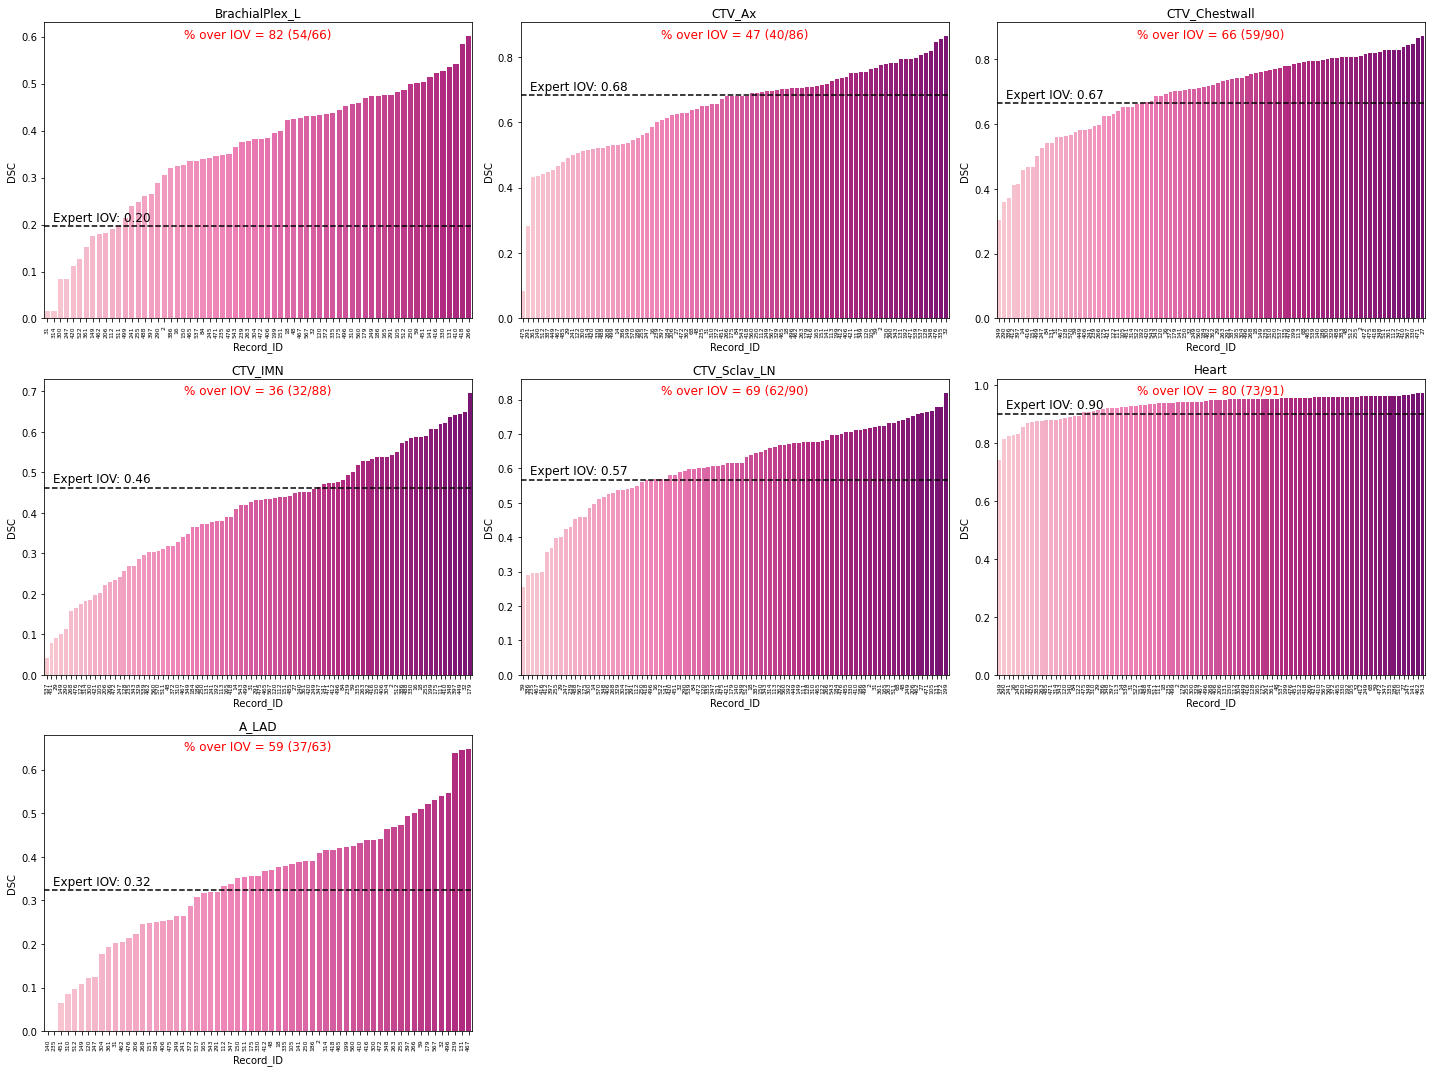

Sarcoma
(110, 44)
unique obervers 42


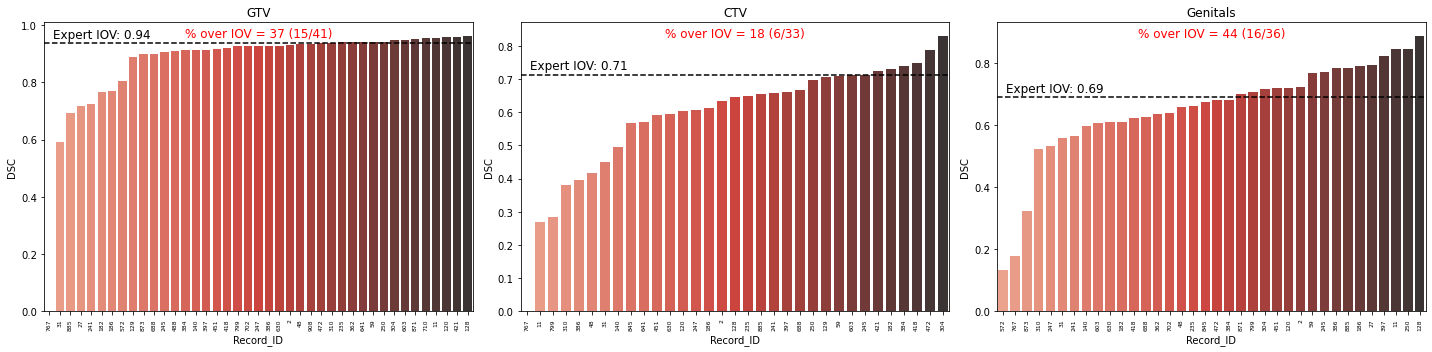

H&N
(452, 44)
unique obervers 50


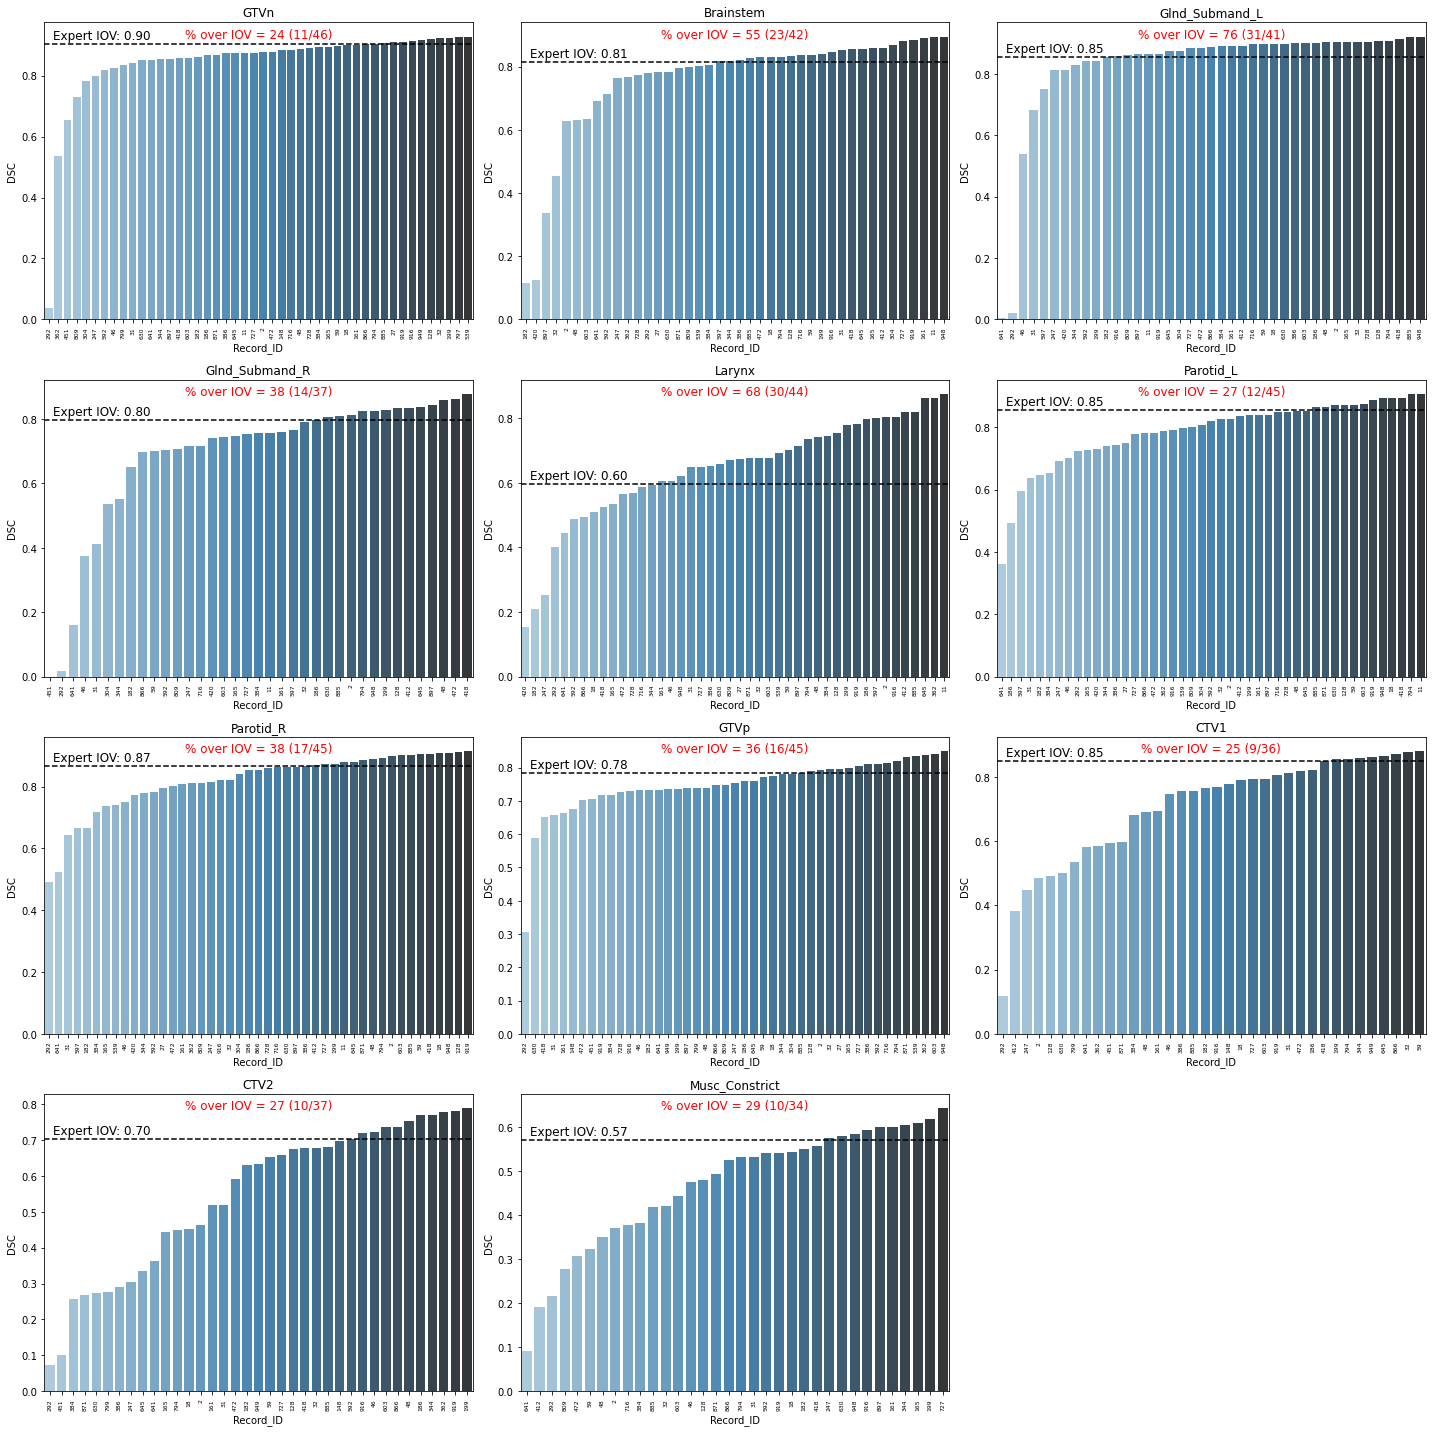

GYN
(112, 44)
unique obervers 32


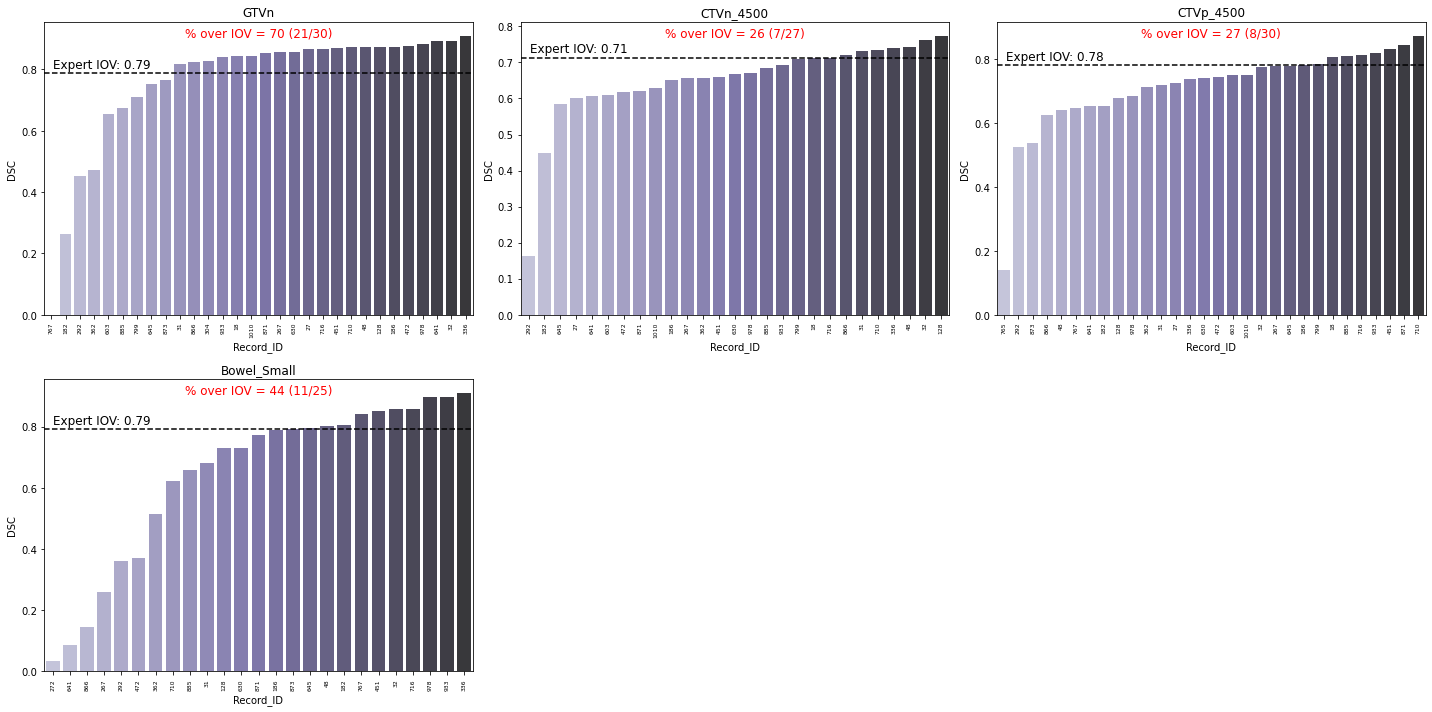

GI
(48, 44)
unique obervers 17


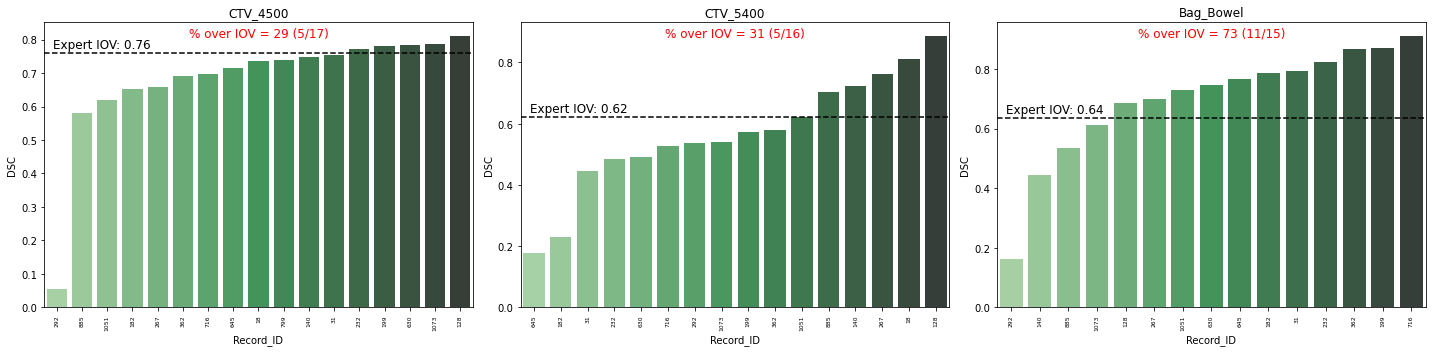

SDSC
Breast
(574, 44)
unique obervers 94


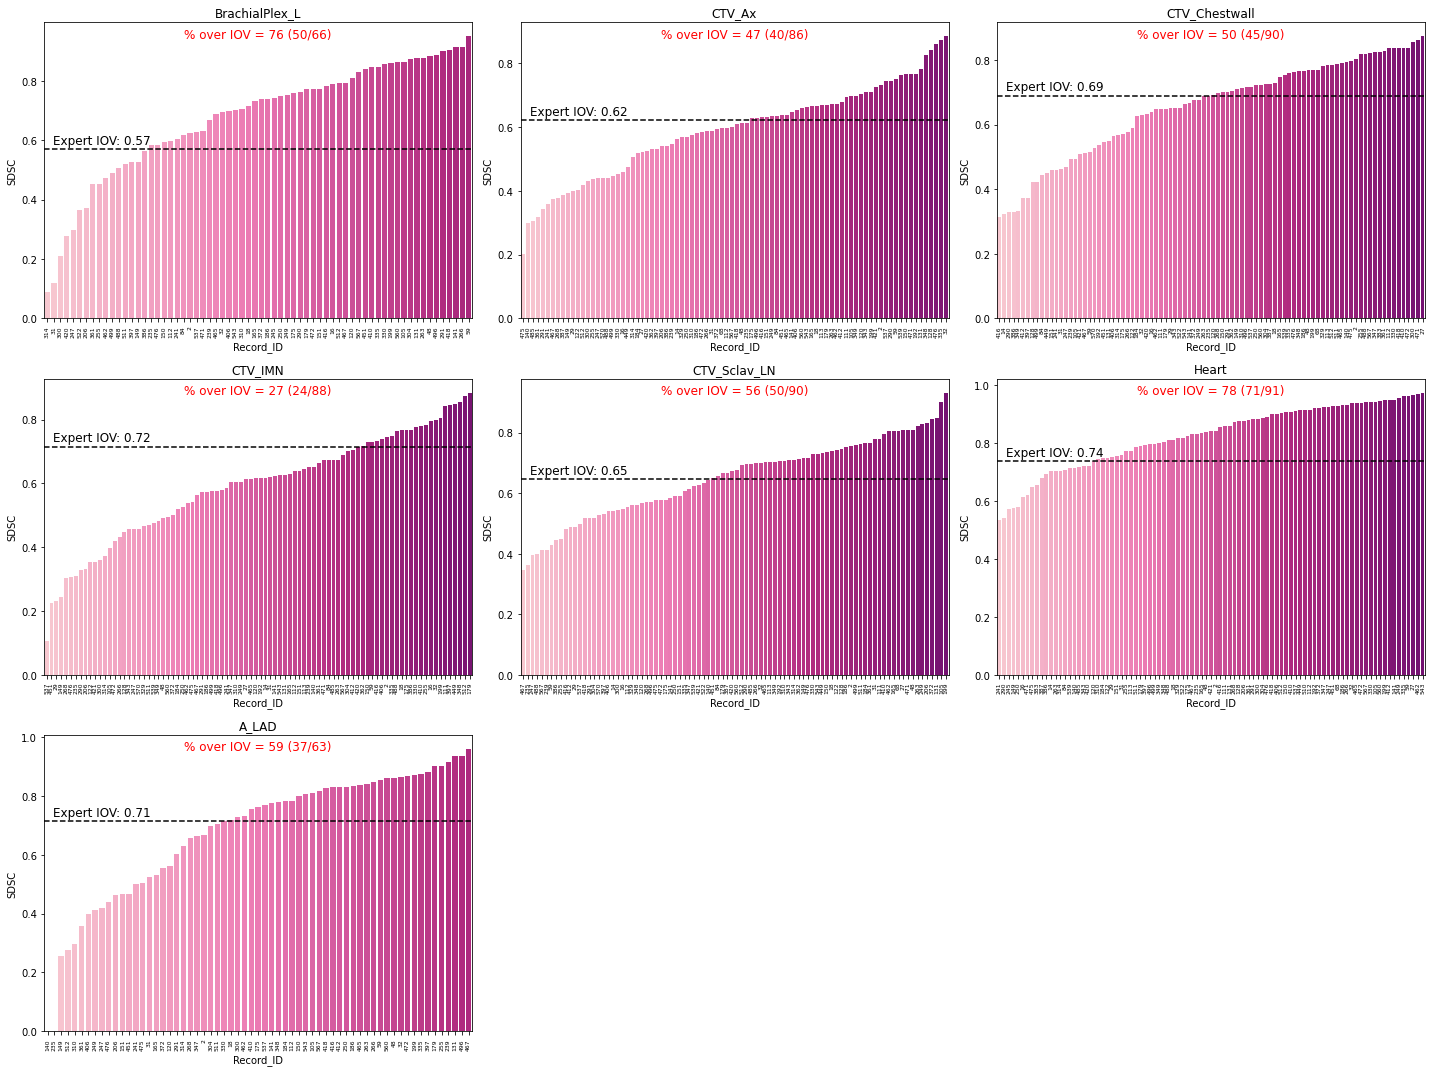

Sarcoma
(110, 44)
unique obervers 42


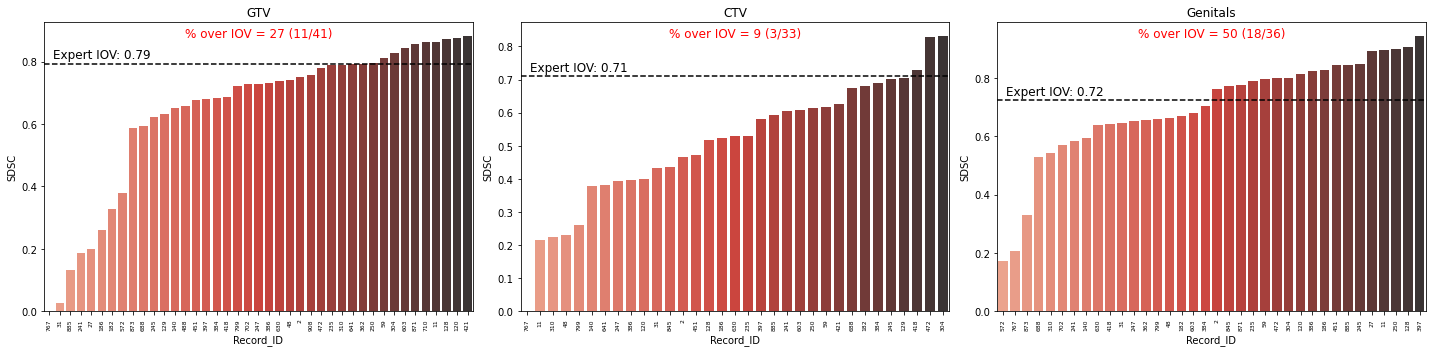

H&N
(452, 44)
unique obervers 50


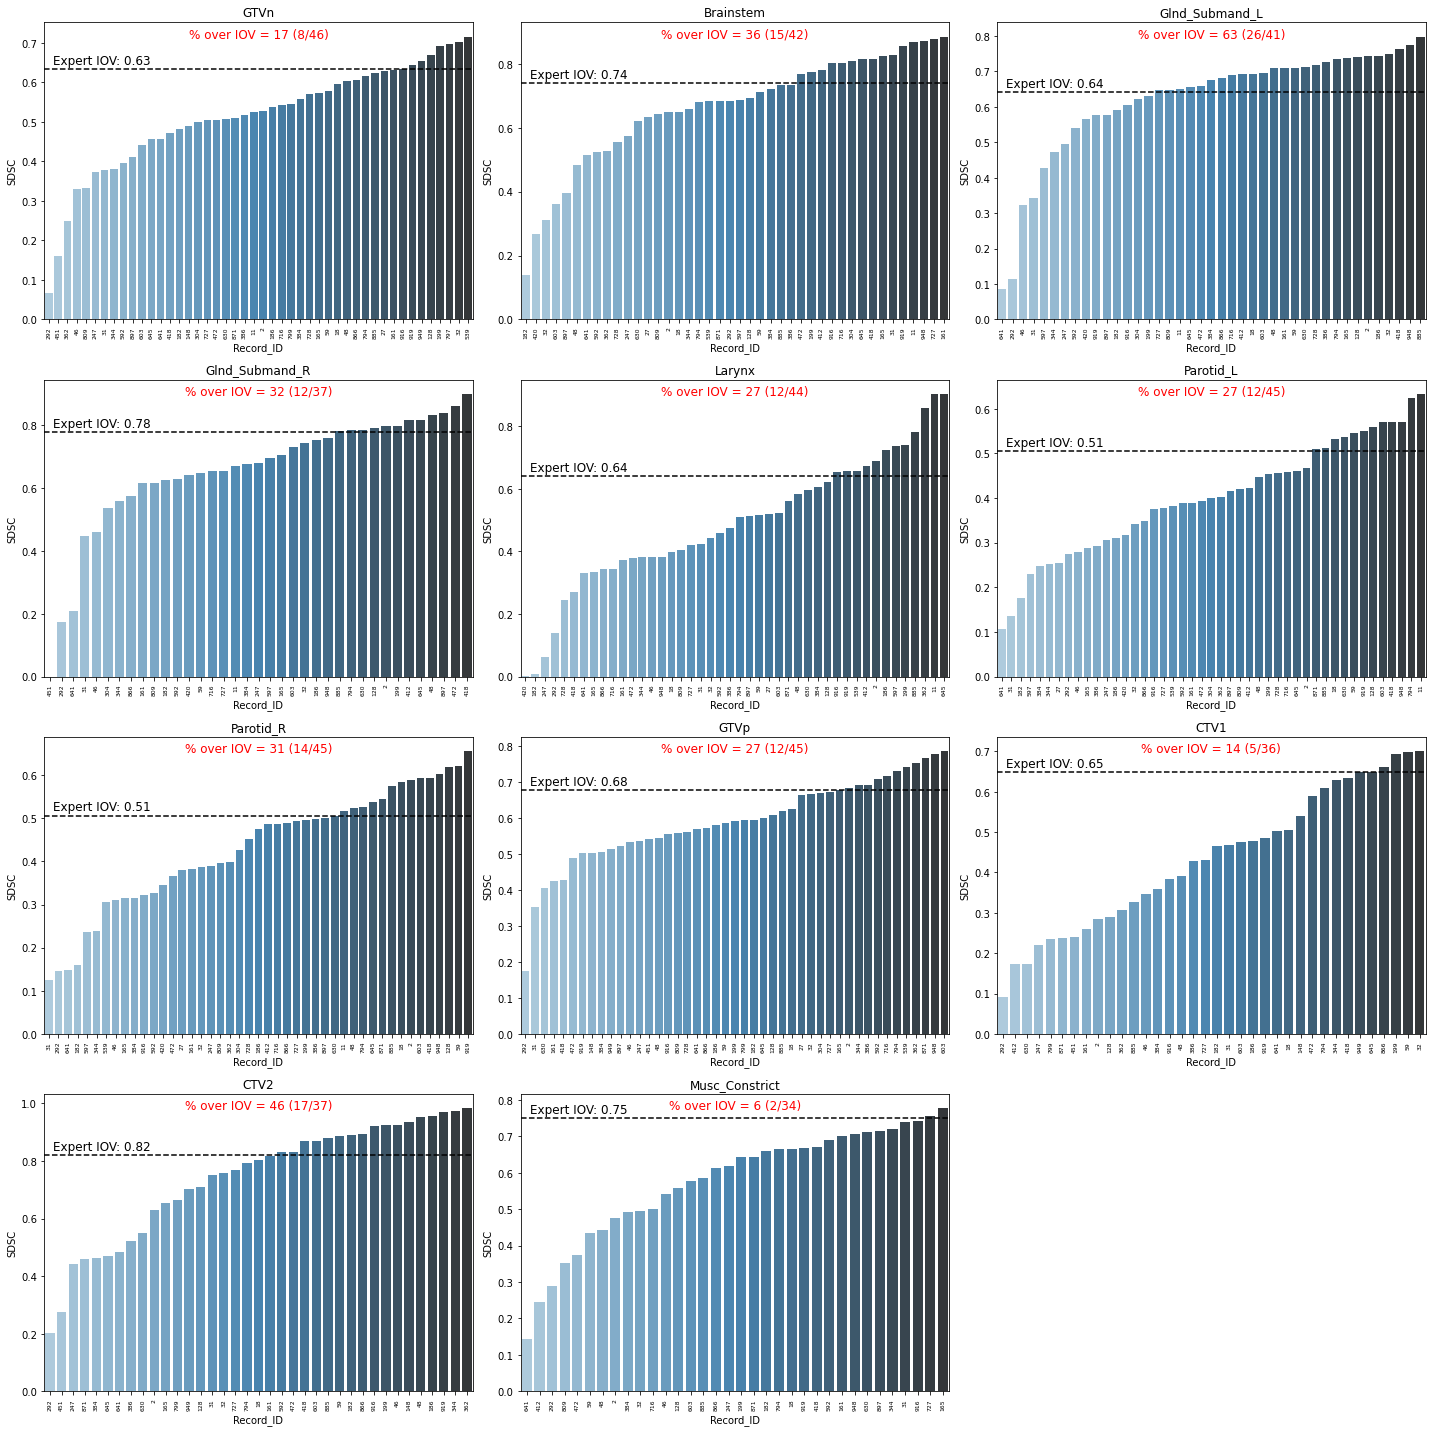

GYN
(112, 44)
unique obervers 32


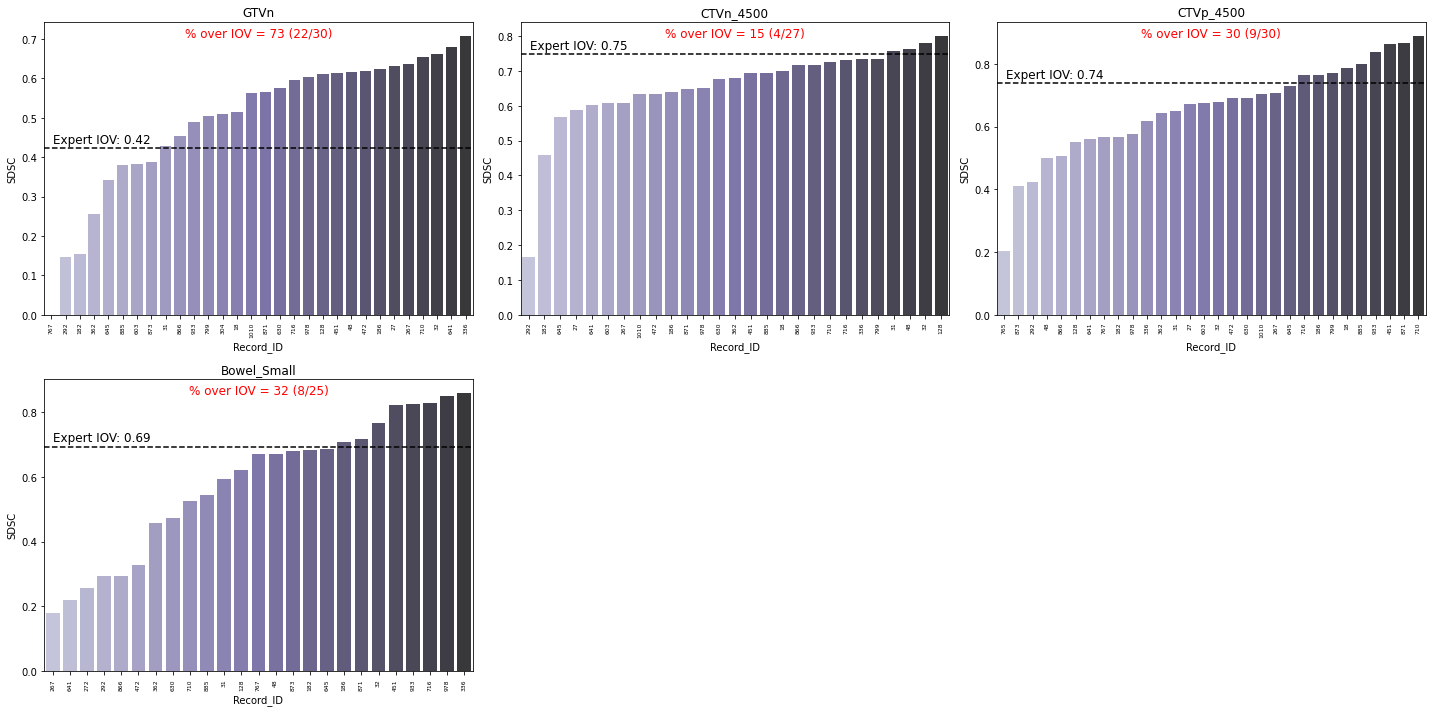

GI
(48, 44)
unique obervers 17


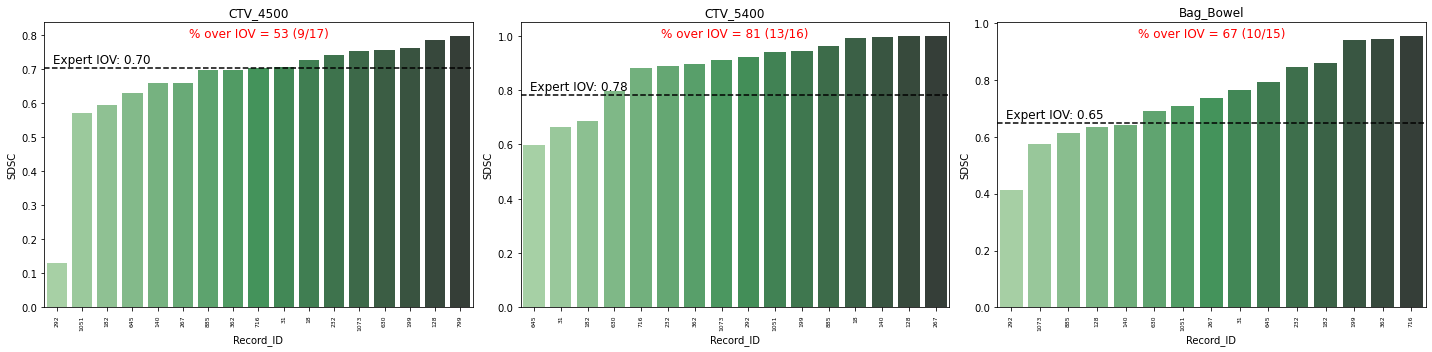

Wall time: 1min 28s


In [3]:
%%time

# making the dataframe which will store ratio values
counter = -1  # for df 
ratio_df = pd.DataFrame(columns=['Case', 'ROI', 'Ratio', 'Metric', 'Subtype'])

# Define a colormap similar to the "Blues_d" map but in pink, for use in plotting later
cmap = mcolors.LinearSegmentedColormap.from_list("", ["#FFC0CB", "#FF69B4", "#C71585", "#800080"])
colors = cmap(np.linspace(0, 1, 92)) # Generate a list of colors from the colormap
colors_hex = [mcolors.to_hex(c) for c in colors] # Convert colors from RGBA to HEX

# map disease sites to specific color palletes, mainly for use for plotting later 
site_lists = [
    ['Breast', colors_hex],
    ['Sarcoma', 'Reds_d'],
    ['H&N', 'Blues_d'],
    ['GYN', 'Purples_d'],
    ['GI', 'Greens_d']
                ] 

metric_list = ["DSC", "SDSC"]

for metric in metric_list:
    print(metric) # debug
    
    for site_list in site_lists:
        site = site_list[0]
        color = site_list[1]
        
        print(site) # debug

        site_df = pd.read_csv(os.path.join(csv_path, site+'.csv')) # path to csv files generated from previous notebook

        ### DATA PROCESSING

        # transform academic variable to binary
        site_df['Practice_type'] = np.where(site_df['Practice_type'] == 'Academic/university', 'Academic', 'Non-academic')
    
        # remove non-physicians
        site_df = site_df[(site_df['What_is_your_profession'] == 'Radiation Oncologist/Clinical Oncologist')] # only physicians ignore residents and others
    
        print(site_df.shape) # check size
        print('unique obervers', len(site_df['Record_ID'].unique()))

        ### PLOTTING

        # List of unique 'ROI' values
        rois = site_df['ROI'].unique()

        # Define the number of rows and columns
        n_rows = math.ceil(len(rois) / 3)
        n_cols = 3

        # Create a figure and define the number of subplots based on the unique 'ROI' count
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
        axs = axs.ravel()  # Flatten the array of axes
        
        # determine subtype
        site_df['ROI_category'] = site_df['ROI'].apply(lambda x: 'Tumor' if 'TV' in str(x) else 'OAR')

        # For each 'ROI', create a subplot
        for ax, roi in zip(axs, rois):
            # Filter the dataframe for the current 'ROI'
            data = site_df[site_df['ROI'] == roi]

            # Sort the data by 'DSC' and get the 'Record ID' in the order of 'DSC' values
            ids_sorted_by_dsc = data.sort_values(metric)['Record_ID']

            # Create the bar plot and use the 'order' parameter to set the order of bars
            sns.barplot(x='Record_ID', y=metric, data=data, ax=ax, palette= color, order=ids_sorted_by_dsc)

            # create horizontal dotted cutoff line
            #new_col = 'Median_'+ metric
            new_col = metric + '_expert_IOV'
            #threshold_df[new_col] = threshold_df[metric+'_list'].apply(np.median) # get the median values for ROIs
            value = site_df[site_df['ROI'] == roi][new_col].values[0]
            ax.axhline(y=value, color='black', linestyle='dashed')

            # Count the number of cases above and below the threshold
            num_above = len(data[data[metric] >= value])
            num_below = len(data[data[metric] < value])

            # Calculate the ratio of cases equal to or above the threshold
            ratio_above = num_above / (num_above + num_below) # can probably do some descriptive stats with this number potentially, can put in df and group by OAR, GTV, CTV and by site etc.

            ax.annotate(f'Expert IOV: {value:.2f}', 
                        xy=(0.01, value), xycoords=('axes fraction', 'data'), 
                        xytext=(5, 5), textcoords='offset points', fontsize=12, color='black')

            ax.annotate(f'% over IOV = {int(round(ratio_above*100))} ({num_above}/{num_above + num_below})', 
                        xy=(0.5, 0.95), xycoords='axes fraction', 
                        xytext=(0, 0), textcoords='offset points', 
                        fontsize=12, color='red', ha='center')

            # Set the subplot title
            ax.set_title(roi)

            # Rotate the x-axis labels for better readability and adjust label size
            ax.tick_params(axis='x', rotation=90)
            ax.tick_params(axis='x', labelsize=6) # may need to adjust on a case by case basis
            
            # get ROI category
            subtype = site_df[site_df['ROI'] == roi]['ROI_category'].values[0]
            
            # add to ratio dataframe
            counter +=1
            ratio_df.loc[counter] = [site, roi, ratio_above, metric, subtype]

        # If there are less ROIs than total subplots, remove the extra ones
        for i in range(len(rois), len(axs)):
            fig.delaxes(axs[i])

        # Adjust subplot parameters to give specified padding
        plt.tight_layout()
        
        # save plots
        plt.savefig('plot_outputs//' + site + '_' + metric + ".pdf")
        #plt.savefig('plot_outputs//' + site + '_' + metric + ".png", dpi=600)

        # Show the plot
        plt.show()


In [4]:
ratio_df # show df

,Case,ROI,Ratio,Metric,Subtype
0,Breast,BrachialPlex_L,0.818182,DSC,OAR
1,Breast,CTV_Ax,0.465116,DSC,Tumor
2,Breast,CTV_Chestwall,0.655556,DSC,Tumor
3,Breast,CTV_IMN,0.363636,DSC,Tumor
4,Breast,CTV_Sclav_LN,0.688889,DSC,Tumor
5,Breast,Heart,0.802198,DSC,OAR
6,Breast,A_LAD,0.587302,DSC,OAR
7,Sarcoma,GTV,0.365854,DSC,Tumor
8,Sarcoma,CTV,0.181818,DSC,Tumor
9,Sarcoma,Genitals,0.444444,DSC,OAR


In [5]:
# Calculate median and interquartile range stratified by Case
median_by_case = ratio_df.groupby(['Case', 'Metric'])['Ratio'].median()
iqr_by_case = ratio_df.groupby(['Case', 'Metric'])['Ratio'].quantile(0.75) - ratio_df.groupby(['Case', 'Metric'])['Ratio'].quantile(0.25)

print("Median by Case:\n", median_by_case)
print("\nIQR by Case:\n", iqr_by_case)

Median by Case:
 Case     Metric
Breast   DSC       0.655556
         SDSC      0.555556
GI       DSC       0.312500
         SDSC      0.666667
GYN      DSC       0.353333
         SDSC      0.310000
H&N      DSC       0.355556
         SDSC      0.272727
Sarcoma  DSC       0.365854
         SDSC      0.268293
Name: Ratio, dtype: float64

IQR by Case:
 Case     Metric
Breast   DSC       0.219334
         SDSC      0.189881
GI       DSC       0.219608
         SDSC      0.141544
GYN      DSC       0.240185
         SDSC      0.161296
H&N      DSC       0.194530
         SDSC      0.120444
Sarcoma  DSC       0.131313
         SDSC      0.204545
Name: Ratio, dtype: float64


In [6]:
# Calculate count, median, and interquartile range stratified by Subtype and Metric
count_by_subtype_metric = ratio_df.groupby(['Subtype', 'Metric']).size()
median_by_subtype_metric = ratio_df.groupby(['Subtype', 'Metric'])['Ratio'].median()
iqr_by_subtype_metric = ratio_df.groupby(['Subtype', 'Metric'])['Ratio'].quantile(0.75) - ratio_df.groupby(['Subtype', 'Metric'])['Ratio'].quantile(0.25)

# Convert Series to DataFrame
df_median_iqr_count = pd.DataFrame({
    'Count': count_by_subtype_metric,
    'Median': median_by_subtype_metric,
    'IQR': iqr_by_subtype_metric
})

In [7]:
df_median_iqr_count # show df

Count    Median       IQR
Subtype Metric                           
OAR     DSC        13  0.547619  0.354955
        SDSC       13  0.357143  0.323035
Tumor   DSC        15  0.312500  0.152522
        SDSC       15  0.300000  0.294416

## Bayesian regression analysis <a class="anchor" id="regression"></a>

Includes linear regression with Bayesian uncertainity estimation using bambi package.

DSC_binary
Breast
(574, 35)
unique obervers 94
median year 6.0
median colleagues 5.0
DSC_binary ~ C(ROI_category) + C(Location) + (1|"Record_ID") + C(Gender, Treatment("Male")) + "Total_years_of_practice" + C(Practice_type, Treatment("Non-academic")) + "Colleague_num" + C(Colleague_presence, Treatment("No")) + C(Race_white, Treatment("Unchecked")) + C(Treat_site_Breast, Treatment("Unchecked"))
model defined


Modeling the probability that DSC_binary==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [Intercept, C(ROI_category), C(Location), C(Gender, Treatment("Male")), Total_years_of_practice, C(Practice_type, Treatment("Non-academic")), Colleague_num, C(Colleague_presence, Treatment("No")), C(Race_white, Treatment("Unchecked")), C(Treat_site_Breast, Treatment("Unchecked")), 1|Record_ID_sigma, 1|Record_ID_offset]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 6128 seconds.
There were 83 divergences after tuning. Increase `target_accept` or reparameterize.


Bambi fitted


Sampling: [1|Record_ID_sigma, C(Colleague_presence, Treatment("No")), C(Gender, Treatment("Male")), C(Location), C(Practice_type, Treatment("Non-academic")), C(ROI_category), C(Race_white, Treatment("Unchecked")), C(Treat_site_Breast, Treatment("Unchecked")), Colleague_num, Intercept, Total_years_of_practice]


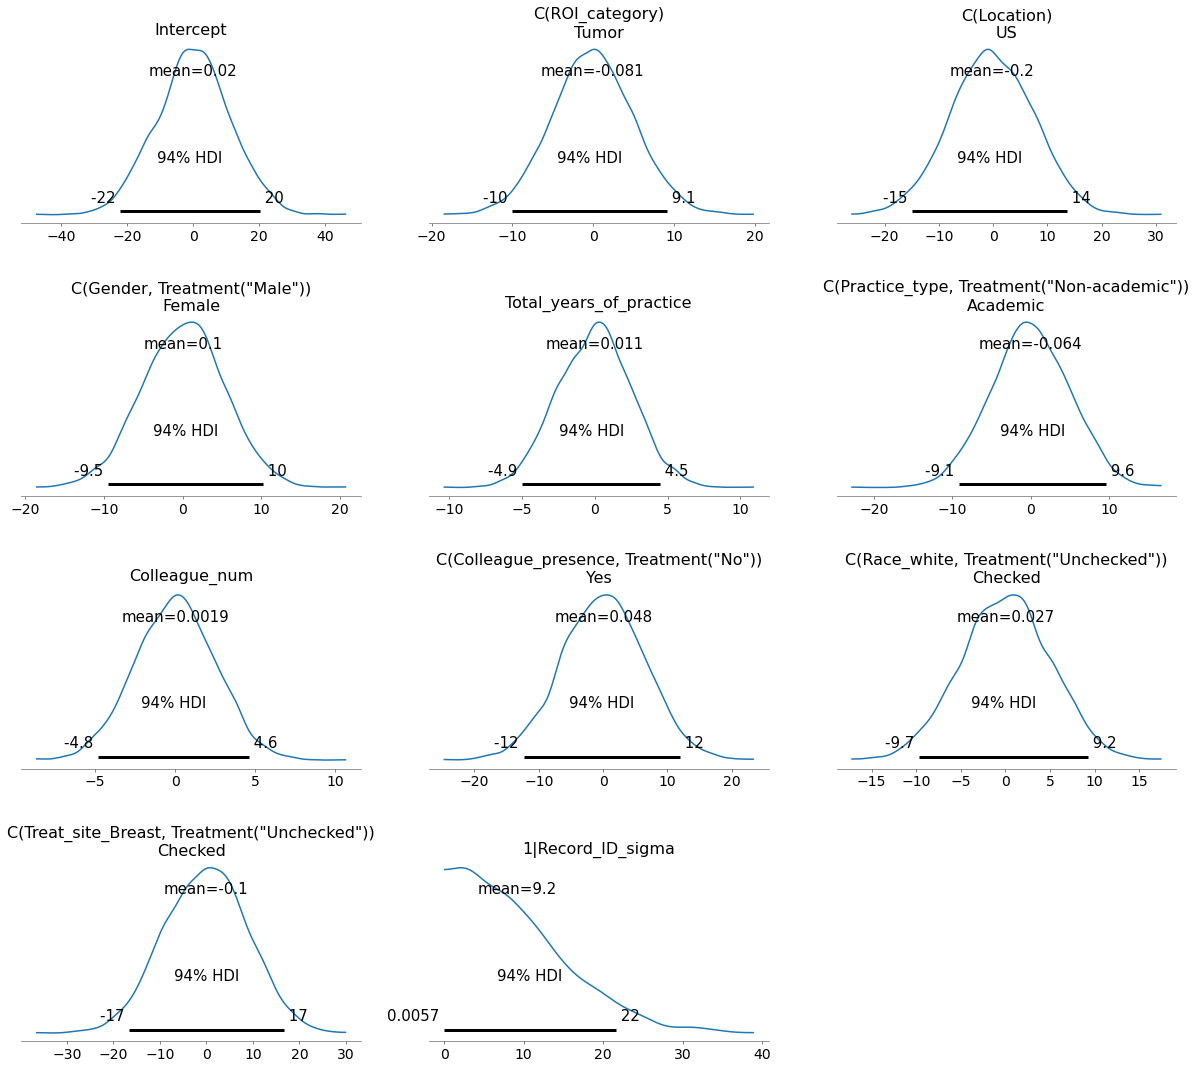

Modeling the probability that DSC_binary==1


Sarcoma
(110, 35)
unique obervers 42
median year 6.5
median colleagues 4.0
DSC_binary ~ C(ROI_category) + C(Location) + (1|"Record_ID") + C(Gender, Treatment("Male")) + "Total_years_of_practice" + C(Practice_type, Treatment("Non-academic")) + "Colleague_num" + C(Colleague_presence, Treatment("No")) + C(Race_white, Treatment("Unchecked")) + C(Treat_site_Sarcoma, Treatment("Unchecked"))
model defined


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [Intercept, C(ROI_category), C(Location), C(Gender, Treatment("Male")), Total_years_of_practice, C(Practice_type, Treatment("Non-academic")), Colleague_num, C(Colleague_presence, Treatment("No")), C(Race_white, Treatment("Unchecked")), C(Treat_site_Sarcoma, Treatment("Unchecked")), 1|Record_ID_sigma, 1|Record_ID_offset]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 1601 seconds.
There were 99 divergences after tuning. Increase `target_accept` or reparameterize.


Bambi fitted


Sampling: [1|Record_ID_sigma, C(Colleague_presence, Treatment("No")), C(Gender, Treatment("Male")), C(Location), C(Practice_type, Treatment("Non-academic")), C(ROI_category), C(Race_white, Treatment("Unchecked")), C(Treat_site_Sarcoma, Treatment("Unchecked")), Colleague_num, Intercept, Total_years_of_practice]


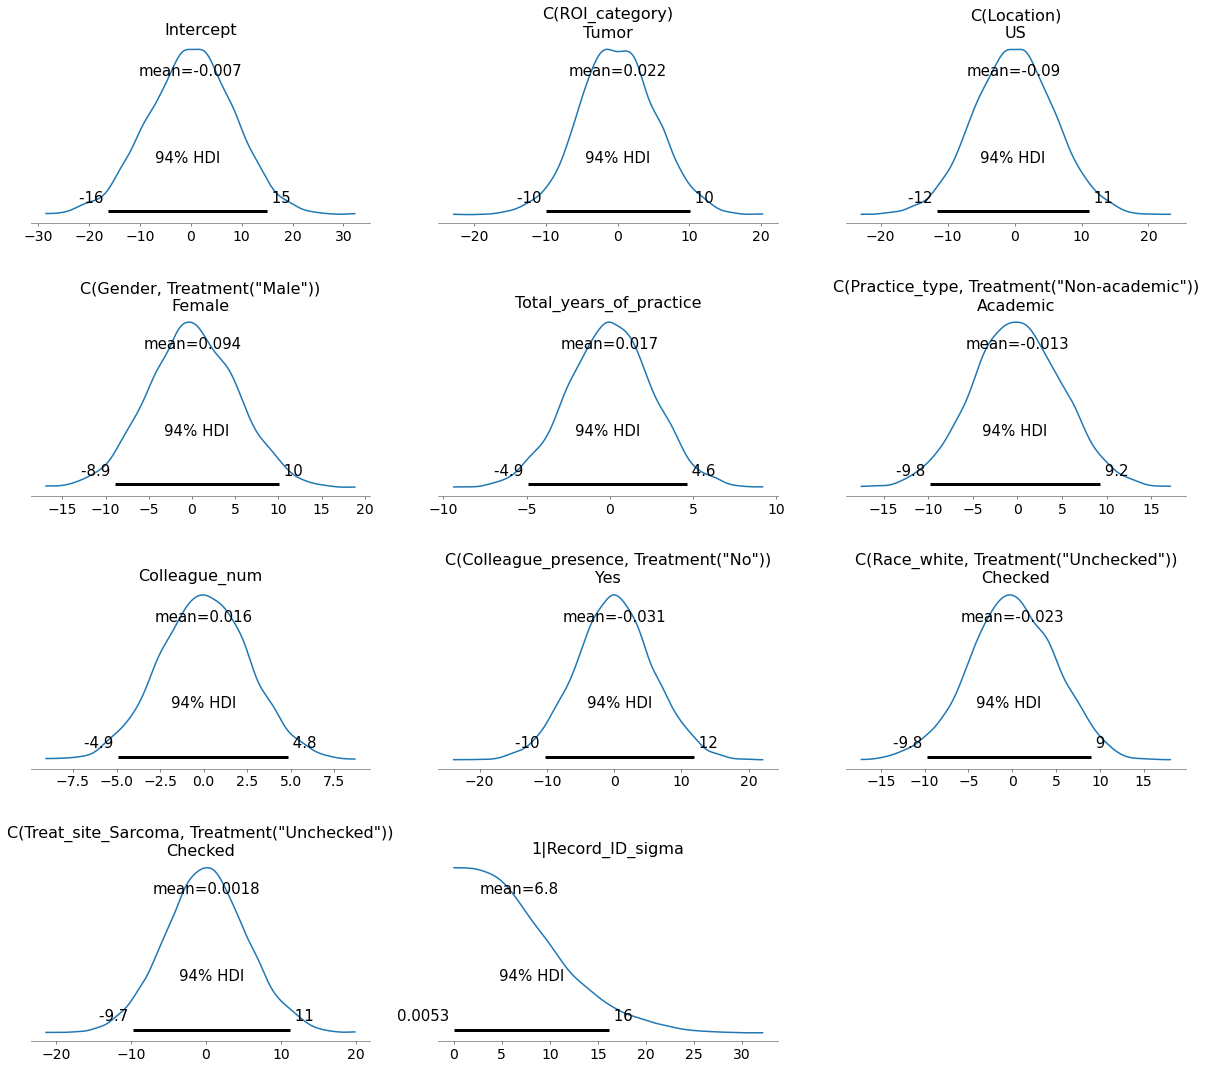

Modeling the probability that DSC_binary==1


H&N
(452, 35)
unique obervers 50
median year 6.0
median colleagues 6.0
DSC_binary ~ C(ROI_category) + C(Location) + (1|"Record_ID") + C(Gender, Treatment("Male")) + "Total_years_of_practice" + C(Practice_type, Treatment("Non-academic")) + "Colleague_num" + C(Colleague_presence, Treatment("No")) + C(Race_white, Treatment("Unchecked")) + C(Treat_site_Head__Neck, Treatment("Unchecked"))
model defined


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [Intercept, C(ROI_category), C(Location), C(Gender, Treatment("Male")), Total_years_of_practice, C(Practice_type, Treatment("Non-academic")), Colleague_num, C(Colleague_presence, Treatment("No")), C(Race_white, Treatment("Unchecked")), C(Treat_site_Head__Neck, Treatment("Unchecked")), 1|Record_ID_sigma, 1|Record_ID_offset]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 5904 seconds.


Bambi fitted


Sampling: [1|Record_ID_sigma, C(Colleague_presence, Treatment("No")), C(Gender, Treatment("Male")), C(Location), C(Practice_type, Treatment("Non-academic")), C(ROI_category), C(Race_white, Treatment("Unchecked")), C(Treat_site_Head__Neck, Treatment("Unchecked")), Colleague_num, Intercept, Total_years_of_practice]


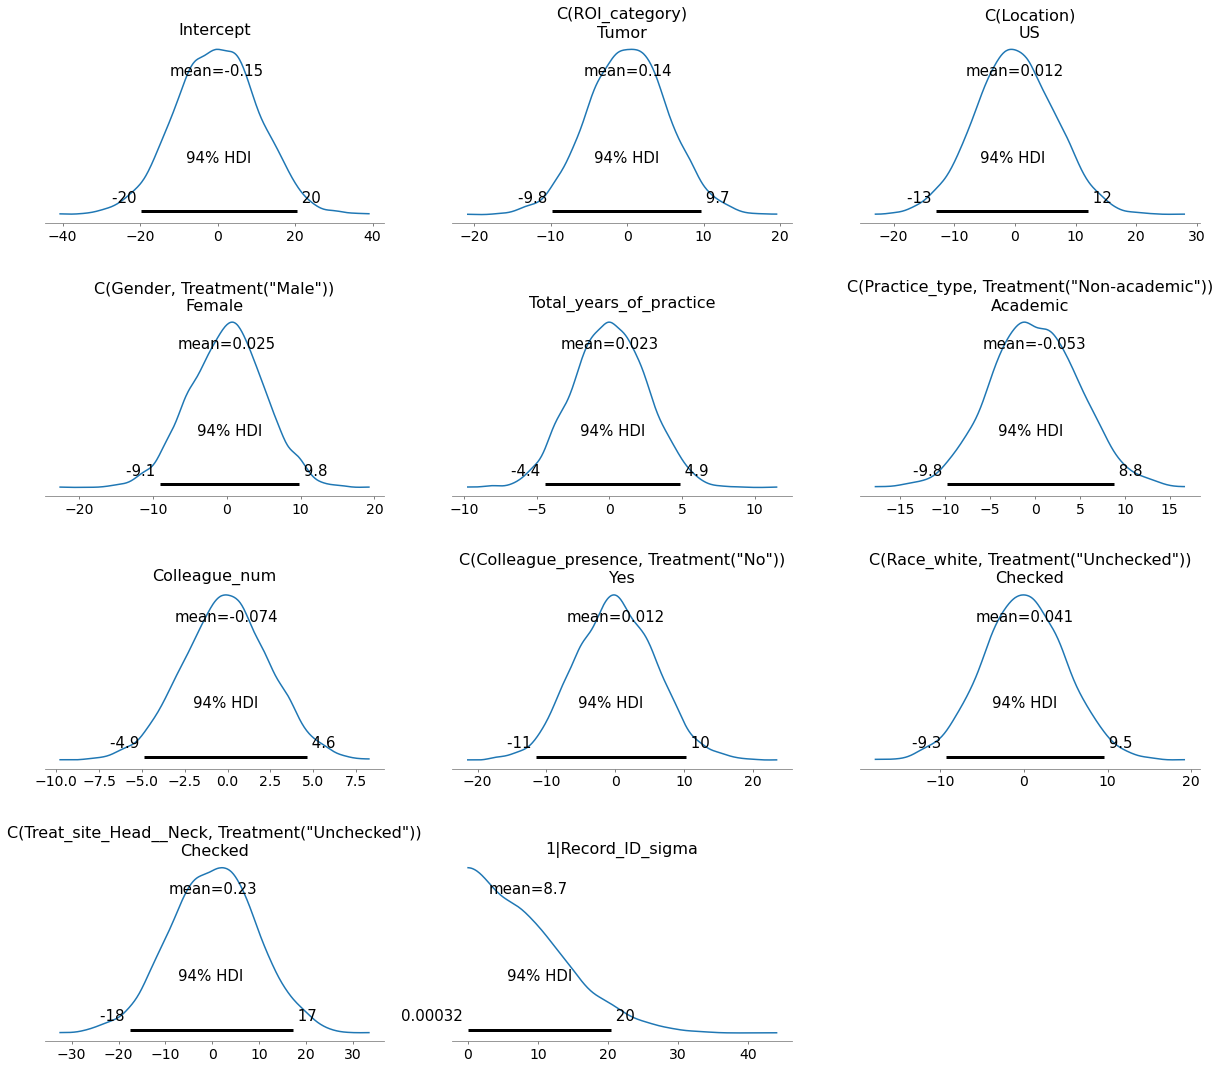

Modeling the probability that DSC_binary==1


GYN
(112, 35)
unique obervers 32
median year 6.0
median colleagues 5.0
DSC_binary ~ C(ROI_category) + C(Location) + (1|"Record_ID") + C(Gender, Treatment("Male")) + "Total_years_of_practice" + C(Practice_type, Treatment("Non-academic")) + "Colleague_num" + C(Colleague_presence, Treatment("No")) + C(Race_white, Treatment("Unchecked")) + C(Treat_site_Gynecologic, Treatment("Unchecked"))
model defined


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [Intercept, C(ROI_category), C(Location), C(Gender, Treatment("Male")), Total_years_of_practice, C(Practice_type, Treatment("Non-academic")), Colleague_num, C(Colleague_presence, Treatment("No")), C(Race_white, Treatment("Unchecked")), C(Treat_site_Gynecologic, Treatment("Unchecked")), 1|Record_ID_sigma, 1|Record_ID_offset]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 1549 seconds.
There were 37 divergences after tuning. Increase `target_accept` or reparameterize.


Bambi fitted


Sampling: [1|Record_ID_sigma, C(Colleague_presence, Treatment("No")), C(Gender, Treatment("Male")), C(Location), C(Practice_type, Treatment("Non-academic")), C(ROI_category), C(Race_white, Treatment("Unchecked")), C(Treat_site_Gynecologic, Treatment("Unchecked")), Colleague_num, Intercept, Total_years_of_practice]


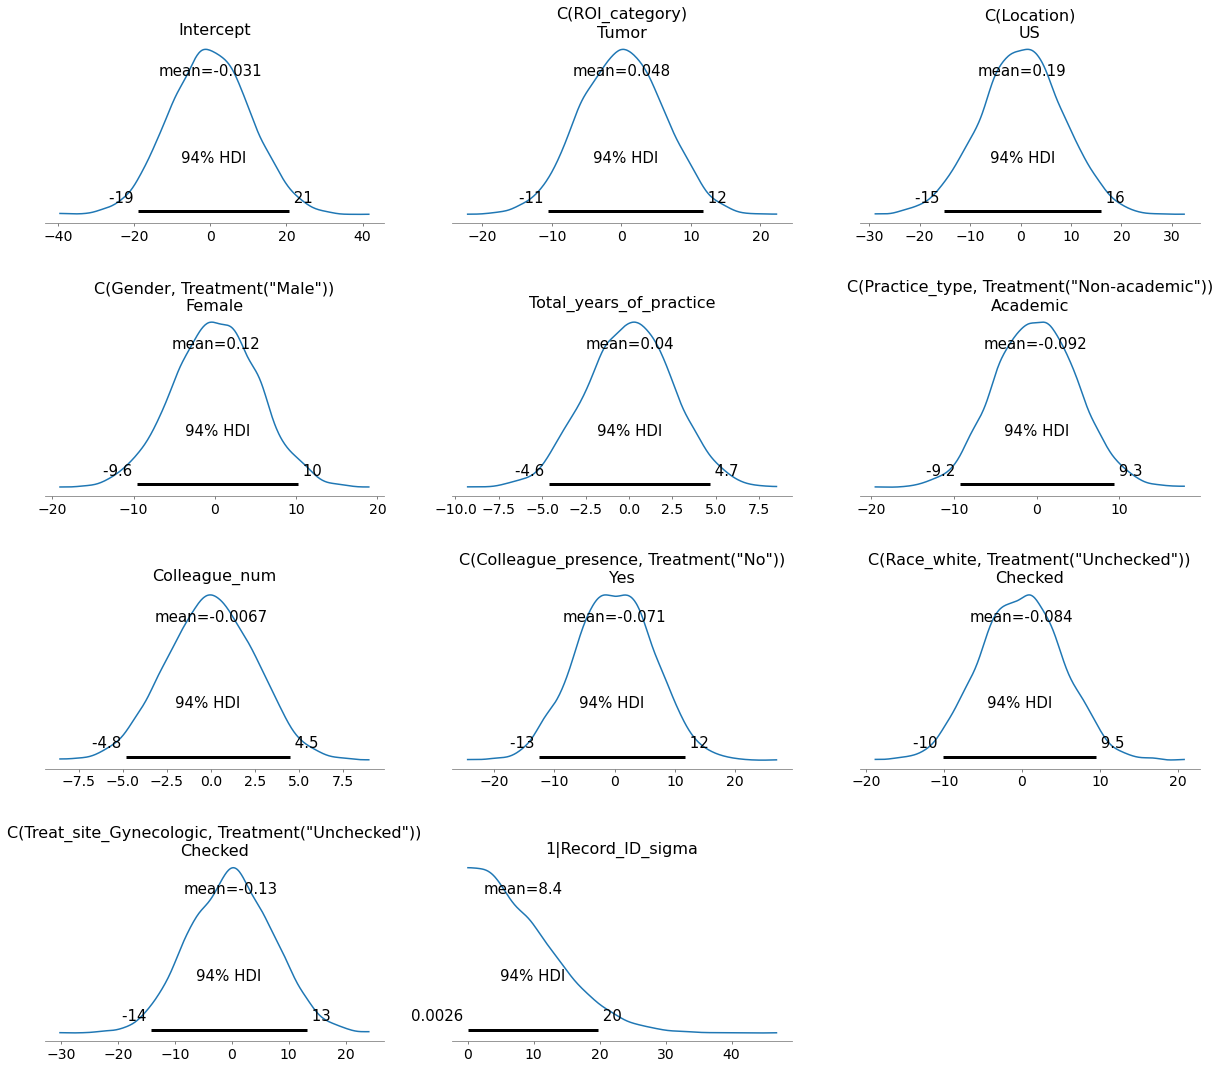

Modeling the probability that DSC_binary==1


GI
(48, 35)
unique obervers 17
median year 10.0
median colleagues 4.0
DSC_binary ~ C(ROI_category) + C(Location) + (1|"Record_ID") + C(Gender, Treatment("Male")) + "Total_years_of_practice" + C(Practice_type, Treatment("Non-academic")) + "Colleague_num" + C(Colleague_presence, Treatment("No")) + C(Race_white, Treatment("Unchecked")) + C(Treat_site_Gastrointestinal, Treatment("Unchecked"))
model defined


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [Intercept, C(ROI_category), C(Location), C(Gender, Treatment("Male")), Total_years_of_practice, C(Practice_type, Treatment("Non-academic")), Colleague_num, C(Colleague_presence, Treatment("No")), C(Race_white, Treatment("Unchecked")), C(Treat_site_Gastrointestinal, Treatment("Unchecked")), 1|Record_ID_sigma, 1|Record_ID_offset]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 841 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


Bambi fitted


Sampling: [1|Record_ID_sigma, C(Colleague_presence, Treatment("No")), C(Gender, Treatment("Male")), C(Location), C(Practice_type, Treatment("Non-academic")), C(ROI_category), C(Race_white, Treatment("Unchecked")), C(Treat_site_Gastrointestinal, Treatment("Unchecked")), Colleague_num, Intercept, Total_years_of_practice]


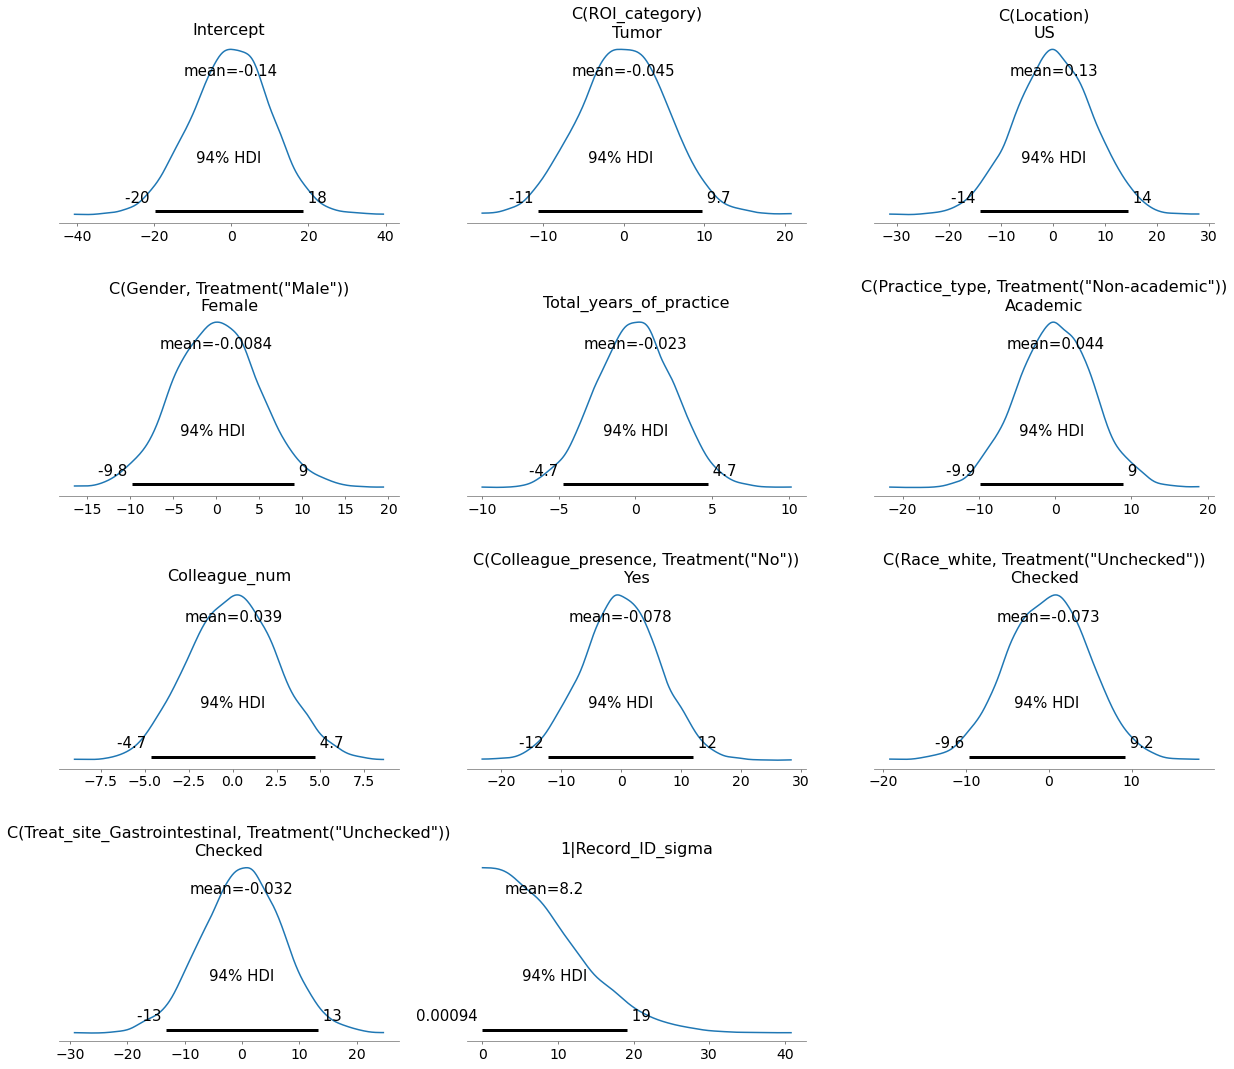

Modeling the probability that SDSC_binary==1


SDSC_binary
Breast
(574, 35)
unique obervers 94
median year 6.0
median colleagues 5.0
SDSC_binary ~ C(ROI_category) + C(Location) + (1|"Record_ID") + C(Gender, Treatment("Male")) + "Total_years_of_practice" + C(Practice_type, Treatment("Non-academic")) + "Colleague_num" + C(Colleague_presence, Treatment("No")) + C(Race_white, Treatment("Unchecked")) + C(Treat_site_Breast, Treatment("Unchecked"))
model defined


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [Intercept, C(ROI_category), C(Location), C(Gender, Treatment("Male")), Total_years_of_practice, C(Practice_type, Treatment("Non-academic")), Colleague_num, C(Colleague_presence, Treatment("No")), C(Race_white, Treatment("Unchecked")), C(Treat_site_Breast, Treatment("Unchecked")), 1|Record_ID_sigma, 1|Record_ID_offset]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 6145 seconds.


Bambi fitted


Sampling: [1|Record_ID_sigma, C(Colleague_presence, Treatment("No")), C(Gender, Treatment("Male")), C(Location), C(Practice_type, Treatment("Non-academic")), C(ROI_category), C(Race_white, Treatment("Unchecked")), C(Treat_site_Breast, Treatment("Unchecked")), Colleague_num, Intercept, Total_years_of_practice]


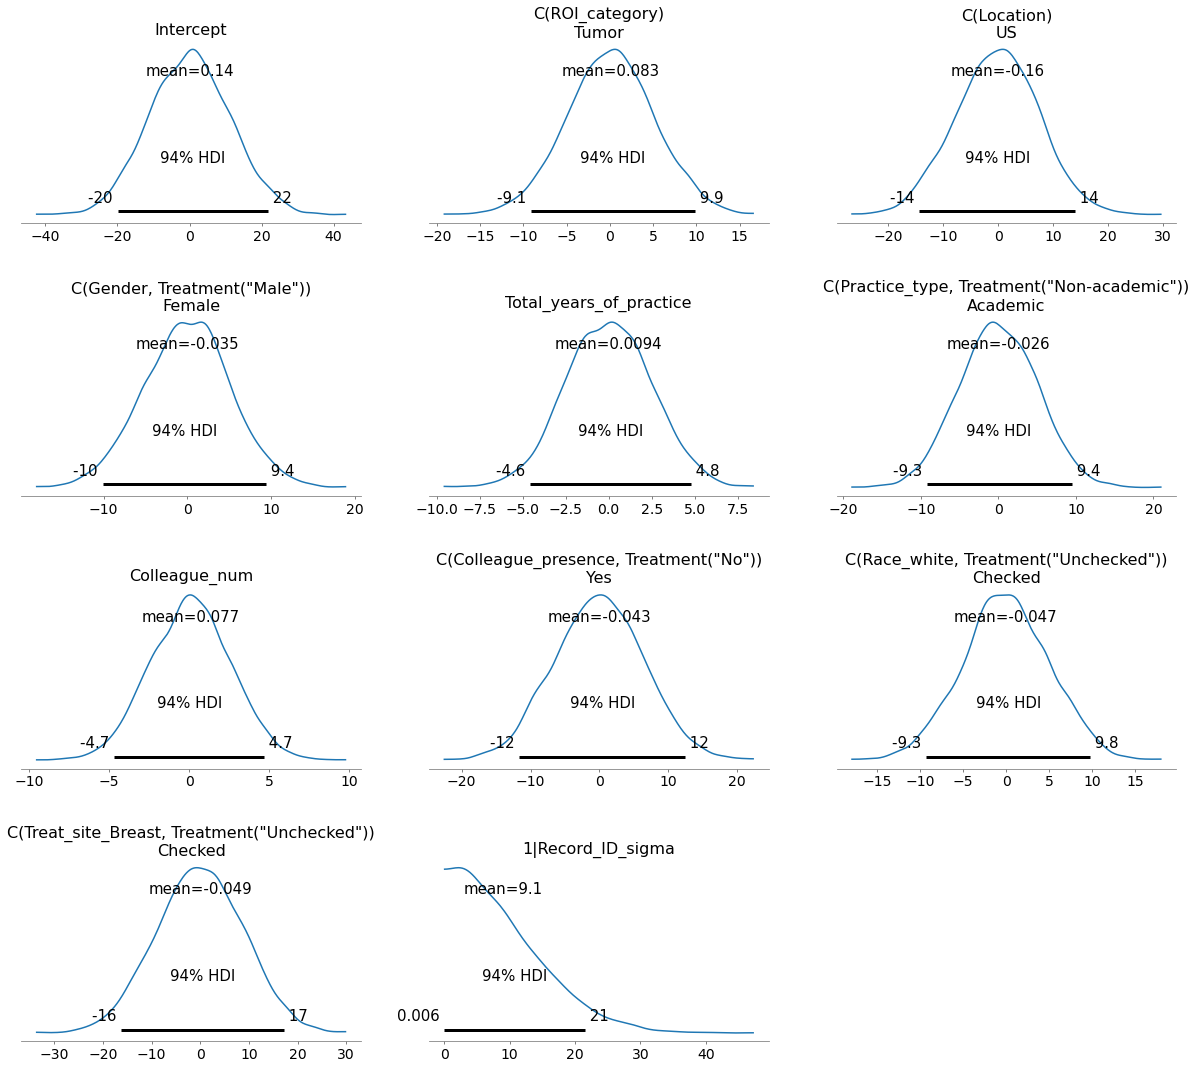

Modeling the probability that SDSC_binary==1


Sarcoma
(110, 35)
unique obervers 42
median year 6.5
median colleagues 4.0
SDSC_binary ~ C(ROI_category) + C(Location) + (1|"Record_ID") + C(Gender, Treatment("Male")) + "Total_years_of_practice" + C(Practice_type, Treatment("Non-academic")) + "Colleague_num" + C(Colleague_presence, Treatment("No")) + C(Race_white, Treatment("Unchecked")) + C(Treat_site_Sarcoma, Treatment("Unchecked"))
model defined


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [Intercept, C(ROI_category), C(Location), C(Gender, Treatment("Male")), Total_years_of_practice, C(Practice_type, Treatment("Non-academic")), Colleague_num, C(Colleague_presence, Treatment("No")), C(Race_white, Treatment("Unchecked")), C(Treat_site_Sarcoma, Treatment("Unchecked")), 1|Record_ID_sigma, 1|Record_ID_offset]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 1758 seconds.


Bambi fitted


Sampling: [1|Record_ID_sigma, C(Colleague_presence, Treatment("No")), C(Gender, Treatment("Male")), C(Location), C(Practice_type, Treatment("Non-academic")), C(ROI_category), C(Race_white, Treatment("Unchecked")), C(Treat_site_Sarcoma, Treatment("Unchecked")), Colleague_num, Intercept, Total_years_of_practice]


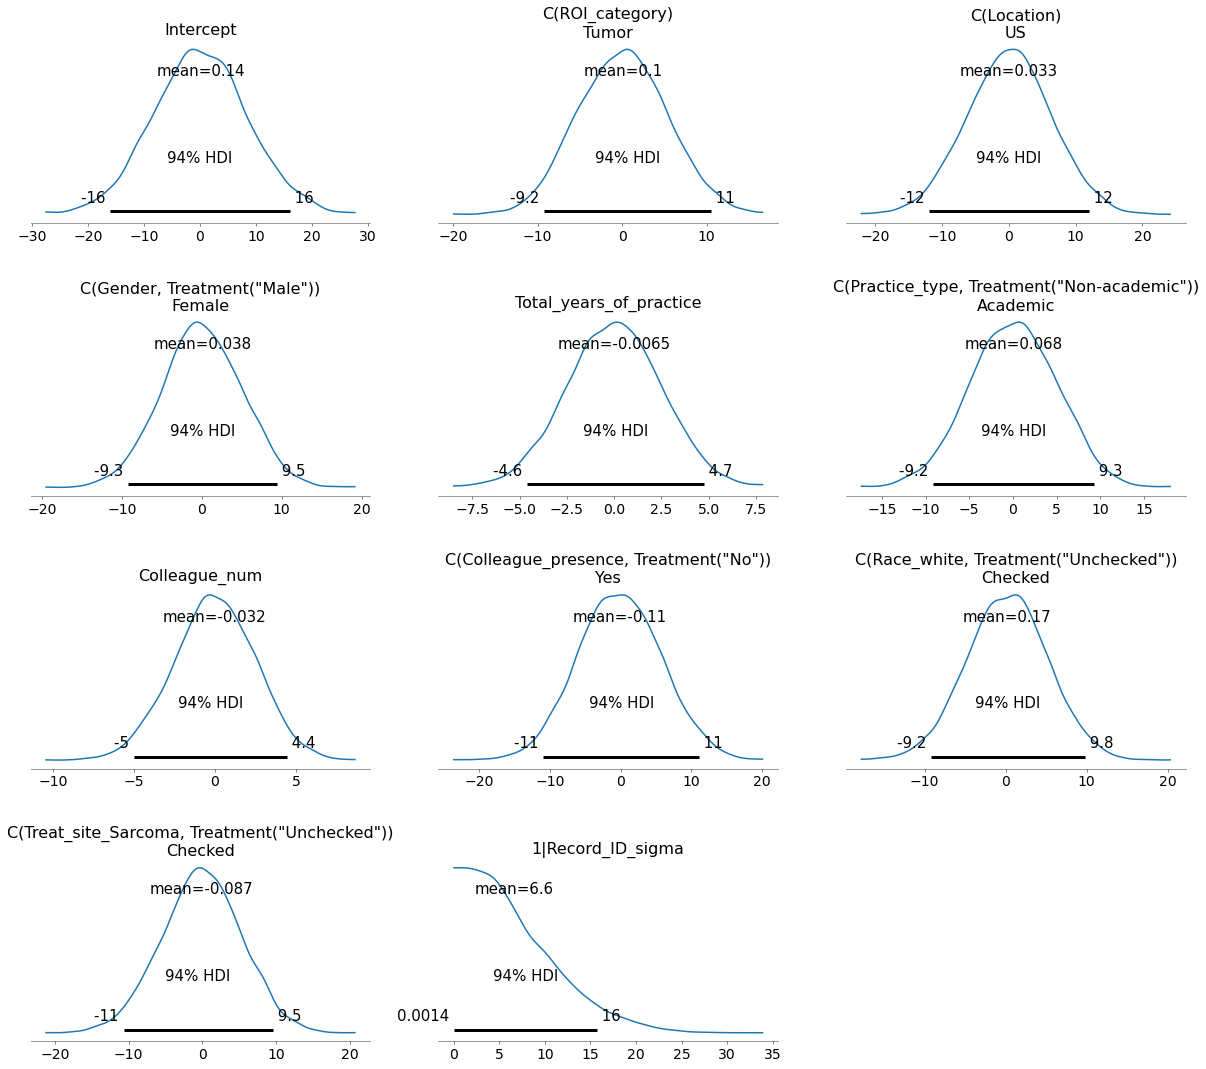

Modeling the probability that SDSC_binary==1


H&N
(452, 35)
unique obervers 50
median year 6.0
median colleagues 6.0
SDSC_binary ~ C(ROI_category) + C(Location) + (1|"Record_ID") + C(Gender, Treatment("Male")) + "Total_years_of_practice" + C(Practice_type, Treatment("Non-academic")) + "Colleague_num" + C(Colleague_presence, Treatment("No")) + C(Race_white, Treatment("Unchecked")) + C(Treat_site_Head__Neck, Treatment("Unchecked"))
model defined


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [Intercept, C(ROI_category), C(Location), C(Gender, Treatment("Male")), Total_years_of_practice, C(Practice_type, Treatment("Non-academic")), Colleague_num, C(Colleague_presence, Treatment("No")), C(Race_white, Treatment("Unchecked")), C(Treat_site_Head__Neck, Treatment("Unchecked")), 1|Record_ID_sigma, 1|Record_ID_offset]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 5037 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


Bambi fitted


Sampling: [1|Record_ID_sigma, C(Colleague_presence, Treatment("No")), C(Gender, Treatment("Male")), C(Location), C(Practice_type, Treatment("Non-academic")), C(ROI_category), C(Race_white, Treatment("Unchecked")), C(Treat_site_Head__Neck, Treatment("Unchecked")), Colleague_num, Intercept, Total_years_of_practice]


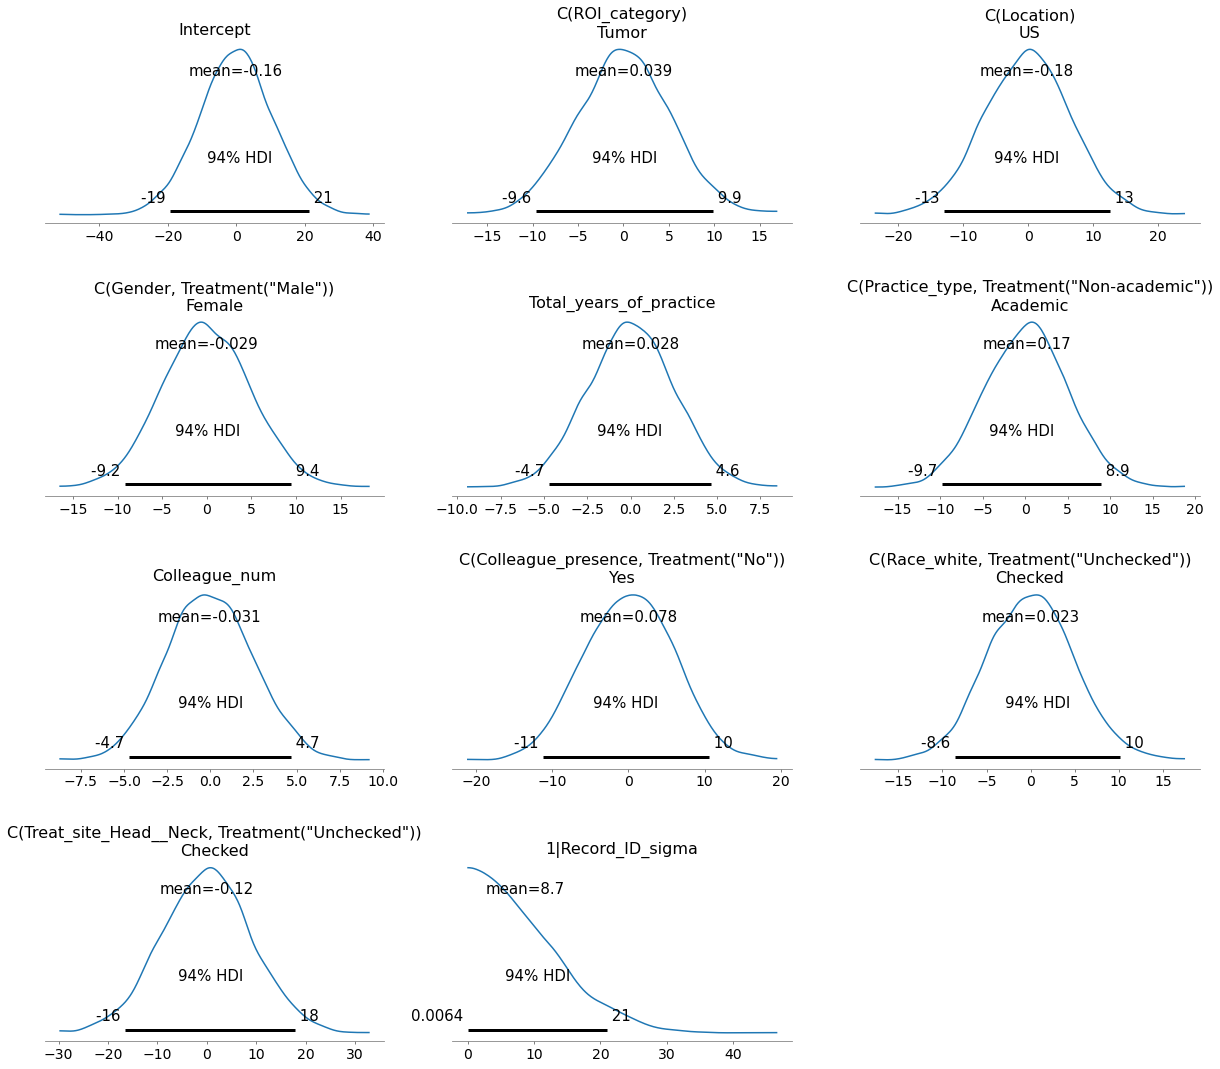

Modeling the probability that SDSC_binary==1


GYN
(112, 35)
unique obervers 32
median year 6.0
median colleagues 5.0
SDSC_binary ~ C(ROI_category) + C(Location) + (1|"Record_ID") + C(Gender, Treatment("Male")) + "Total_years_of_practice" + C(Practice_type, Treatment("Non-academic")) + "Colleague_num" + C(Colleague_presence, Treatment("No")) + C(Race_white, Treatment("Unchecked")) + C(Treat_site_Gynecologic, Treatment("Unchecked"))
model defined


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [Intercept, C(ROI_category), C(Location), C(Gender, Treatment("Male")), Total_years_of_practice, C(Practice_type, Treatment("Non-academic")), Colleague_num, C(Colleague_presence, Treatment("No")), C(Race_white, Treatment("Unchecked")), C(Treat_site_Gynecologic, Treatment("Unchecked")), 1|Record_ID_sigma, 1|Record_ID_offset]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 1612 seconds.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.


Bambi fitted


Sampling: [1|Record_ID_sigma, C(Colleague_presence, Treatment("No")), C(Gender, Treatment("Male")), C(Location), C(Practice_type, Treatment("Non-academic")), C(ROI_category), C(Race_white, Treatment("Unchecked")), C(Treat_site_Gynecologic, Treatment("Unchecked")), Colleague_num, Intercept, Total_years_of_practice]


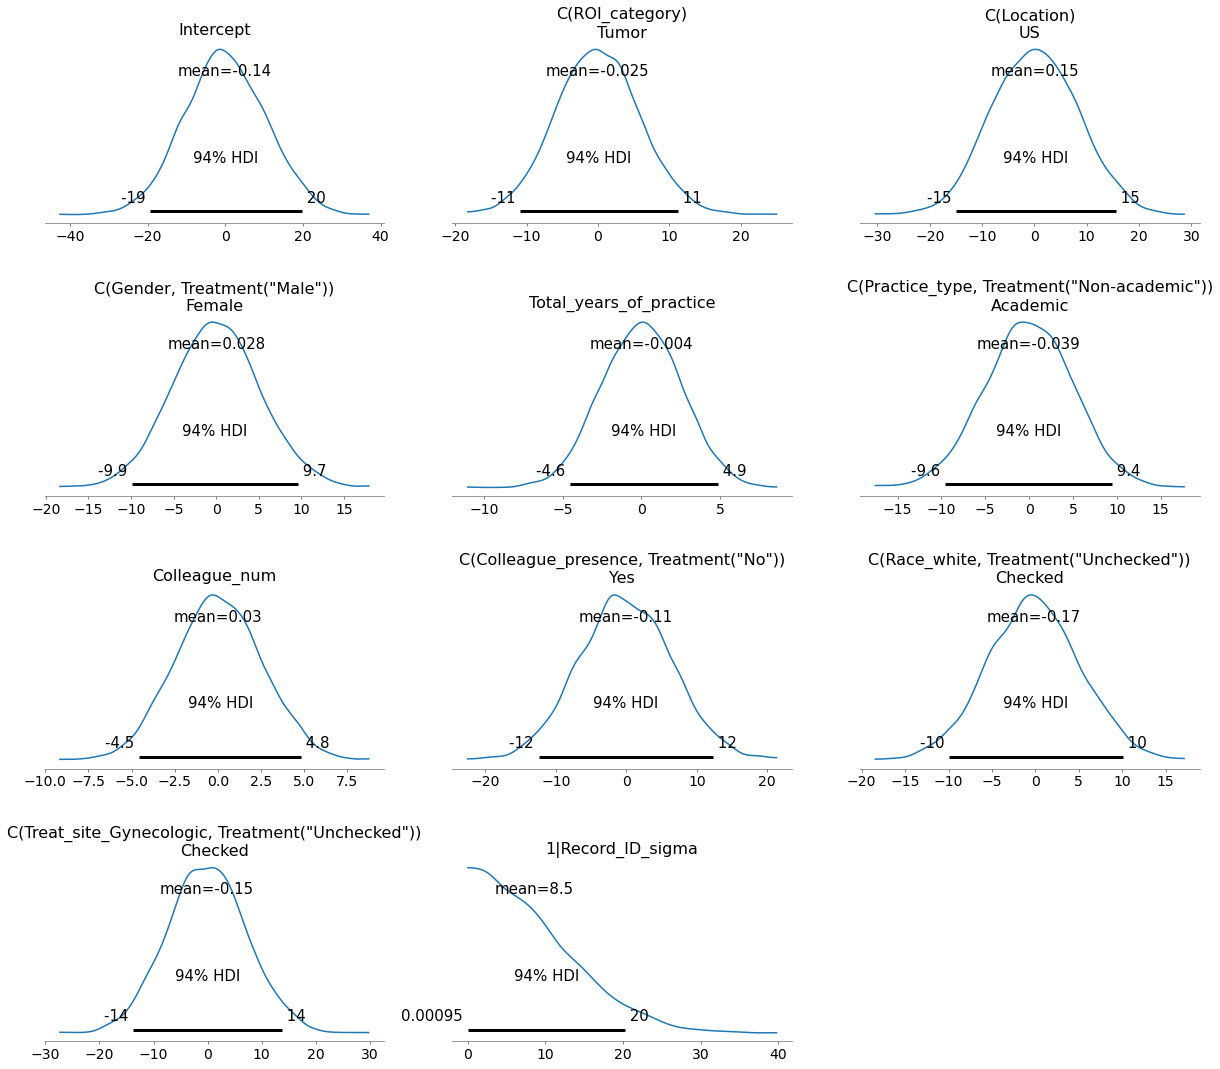

Modeling the probability that SDSC_binary==1


GI
(48, 35)
unique obervers 17
median year 10.0
median colleagues 4.0
SDSC_binary ~ C(ROI_category) + C(Location) + (1|"Record_ID") + C(Gender, Treatment("Male")) + "Total_years_of_practice" + C(Practice_type, Treatment("Non-academic")) + "Colleague_num" + C(Colleague_presence, Treatment("No")) + C(Race_white, Treatment("Unchecked")) + C(Treat_site_Gastrointestinal, Treatment("Unchecked"))
model defined


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 6 jobs)
NUTS: [Intercept, C(ROI_category), C(Location), C(Gender, Treatment("Male")), Total_years_of_practice, C(Practice_type, Treatment("Non-academic")), Colleague_num, C(Colleague_presence, Treatment("No")), C(Race_white, Treatment("Unchecked")), C(Treat_site_Gastrointestinal, Treatment("Unchecked")), 1|Record_ID_sigma, 1|Record_ID_offset]


Sampling 4 chains for 1_500 tune and 10_000 draw iterations (6_000 + 40_000 draws total) took 939 seconds.
There were 53 divergences after tuning. Increase `target_accept` or reparameterize.


Bambi fitted


Sampling: [1|Record_ID_sigma, C(Colleague_presence, Treatment("No")), C(Gender, Treatment("Male")), C(Location), C(Practice_type, Treatment("Non-academic")), C(ROI_category), C(Race_white, Treatment("Unchecked")), C(Treat_site_Gastrointestinal, Treatment("Unchecked")), Colleague_num, Intercept, Total_years_of_practice]


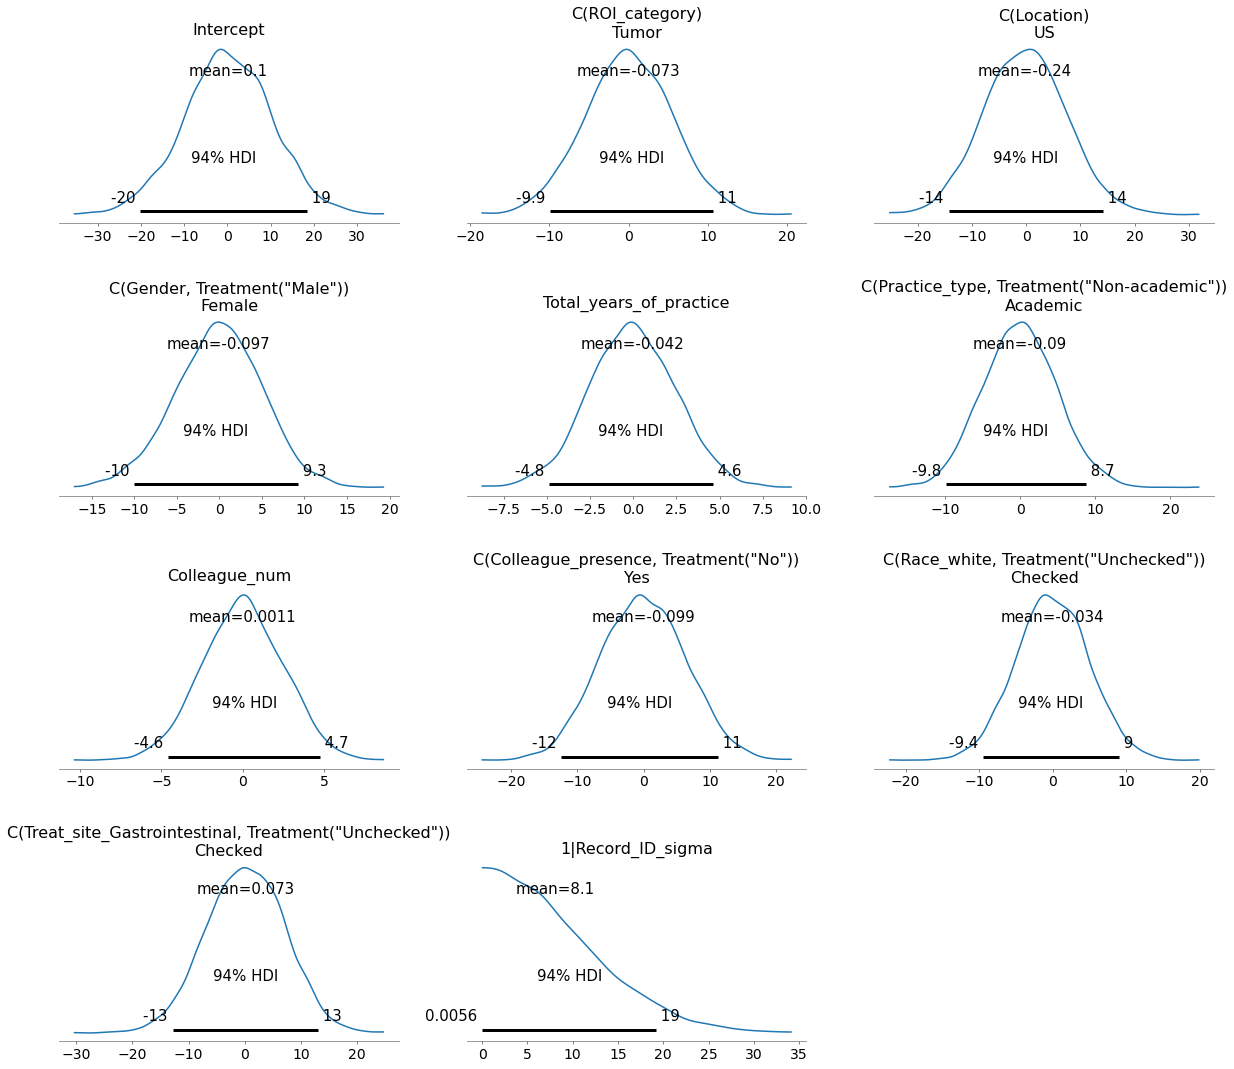

Wall time: 8h 51min 3s


In [8]:
%%time

pval_dfs = [] # empty dataframe where stats info will be filled in 

csv_path = 'csv_files' # path to csv files generated from previous notebook

site_list = [
    'Breast', 
    'Sarcoma', 
    'H&N', 
    'GYN', 
    'GI',
                ] 

metric_list = ["DSC_binary", 
               "SDSC_binary"
              ]

for metric in metric_list:
    print(metric) # debug

    for site in site_list:
        print(site) # debug

        site_df = pd.read_csv(os.path.join(csv_path, site+'.csv'))

        ### DATA PROCESSING
    
        # transform academic variable to binary
        site_df['Practice_type'] = np.where(site_df['Practice_type'] == 'Academic/university', 'Academic', 'Non-academic')
    
        # remove unecessary columns
        remove_columns = [
            'Why_are_you_interested_in_participating_in_this_challenge__Select_all_that_apply_choiceOpportunity_to_win_gift_cards',
               'Why_are_you_interested_in_participating_in_this_challenge__Select_all_that_apply_choiceComparison_to_peersleaderboard',
               'Why_are_you_interested_in_participating_in_this_challenge__Select_all_that_apply_choiceAccess_to_educational_content',
               'Why_are_you_interested_in_participating_in_this_challenge__Select_all_that_apply_choiceAccess_to_contour_datasets_for_guidelineresearch_purposes',
               'How_did_you_first_hear_about_this_challenge__Select_all_that_apply',
               "Please_specify_Other",
            'What_year_of_residency_are_you_in',
            'What_year_did_you_start_practicing_graduate_residency',
                         ]
        site_df = site_df.drop(labels = remove_columns, axis=1)  
    
        # remove non-physicians
        site_df = site_df[(site_df['What_is_your_profession'] == 'Radiation Oncologist/Clinical Oncologist')] # only physicians ignore residents and others
        site_df = site_df.drop(['What_is_your_profession'], axis=1) # now drop the unescessary columns
    
        print(site_df.shape) # check size
        print('unique obervers', len(site_df['Record_ID'].unique()))
    
        print('median year', site_df['Total_years_of_practice'].median())
        print('median colleagues', site_df["Colleague_num"].median())
    
        # fill NA values with column median, imputes 2 patients for breast, got it to work, ideally will need to do this step before for cleanliness, in fact most of the stuff in this cell needs to be done before ALSO IMPUTES YEAR GRADAUTE FOR 4, NEVERMIND GIVES MORE DATAPOINTS FOR BASICALLY EVERYTHING I WAS DUMB
        site_df['Total_years_of_practice'] = site_df['Total_years_of_practice'].fillna(site_df['Total_years_of_practice'].median())
        site_df["Colleague_num"] = site_df["Colleague_num"].fillna(site_df["Colleague_num"].median())

        # make new ROI category columns
        site_df['ROI_category'] = site_df['ROI'].apply(lambda x: 'Tumor' if 'TV' in str(x) else 'OAR')

        # Z score scale (due to outliers) numerical columns has to go after dropping non-usable entries, can comment/uncomment this
        numerical_column_list = ["Total_years_of_practice", "Colleague_num"]
        for column in numerical_column_list:
            site_df[column] = (site_df[column] - site_df[column].mean()) / site_df[column].std() # z-score
    
        if site == "Breast" or site == "Sarcoma":
            choice = site # bad practice to reassign variables
        elif site == "H&N":
            choice = "Head__Neck" 
        elif site == "GYN":
            choice = "Gynecologic" 
        elif site == "GI":
            choice = "Gastrointestinal" 
    
        site_treat = "Treat_site_{0}".format(choice)

        ### BAYESIAN REGRESSION USING BAMBI
        
        formula = (metric + 
                   ' ~ C(ROI_category) + C(Location) + (1|"Record_ID") + C(Gender, Treatment("Male"))' +
                   ' + "Total_years_of_practice" + C(Practice_type, Treatment("Non-academic"))' + 
                   ' + "Colleague_num" + C(Colleague_presence, Treatment("No"))' + 
                   ' + C(Race_white, Treatment("Unchecked"))' + 
                   ' + C(' + site_treat + ', Treatment("Unchecked"))'
                  )

        print(formula)

        # define model using Bambi Model method
        model_bayes = bmb.Model(formula, site_df, family="bernoulli") 
        print("model defined") # debug
        
        # Fit the model using Bayesian approach
        results = model_bayes.fit(draws=10000, cores=6, chains=4, tune=1500, random_seed=0) # real, long run time
        #results = model_bayes.fit(draws=100, cores=6, chains=2, random_seed=0) # debug, quicker
        print("Bambi fitted") # debug
        
        # Save the inference data
        file_name = 'bambi_binary_bayesian_regression_outputs\\' + site + '_' + metric + ".nc"
        az.to_netcdf(results, file_name)

        # plot prior distriubtions to help visualize
        model_bayes.plot_priors()
        plt.subplots_adjust(hspace = 0.5)  # Adjust the vertical spacing
        file_name = 'bambi_binary_bayesian_regression_outputs\\' + site + '_' + metric + "_priorplot.pdf"
        plt.savefig(file_name) # Save the plot
        plt.show() # Show the plot
        
        # get statistical values from arviz
        summary = az.summary(results, hdi_prob=0.89) # 89% credible interval 
        summary = summary.reset_index().rename(columns={'index': 'Variable'}) # variable names are indexes, change so seperate column
        summary['Case'] = site
        summary['Metric'] = metric
        cols = ['Case','Metric']  + [col for col in summary if col not in ['Case', 'Metric']] # move Case and Metric to the front to make it look nicer
        summary = summary[cols]
        #print(summary) # debug
        pval_dfs.append(summary)

        # Write model summary to file   
        file_name = 'bambi_binary_bayesian_regression_outputs\\' + site + '_' + metric + "_model_results.csv"
        summary.to_csv(file_name, index=False)

pval_df_final = pd.concat(pval_dfs, ignore_index=True)
file_name_pickle = 'bambi_binary_bayesian_regression_outputs\\pval_df_final.pkl' # pickle so you can examine later without re-running everything again
pval_df_final.to_pickle(file_name_pickle)


In [9]:
pval_df_final # show df

,Case,Metric,Variable,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
0,Breast,DSC_binary,Intercept,0.902,0.506,0.078,1.687,0.003,0.002,29568.0,22936.0,1.0
1,Breast,DSC_binary,C(ROI_category)[Tumor],-0.972,0.201,-1.293,-0.651,0.001,0.001,39951.0,24478.0,1.0
2,Breast,DSC_binary,C(Location)[US],-0.537,0.380,-1.146,0.061,0.002,0.002,24293.0,20372.0,1.0
3,Breast,DSC_binary,"C(Gender, Treatment(""Male""))[Female]",-0.102,0.256,-0.512,0.307,0.002,0.001,25101.0,19633.0,1.0
4,Breast,DSC_binary,Total_years_of_practice,-0.062,0.118,-0.250,0.125,0.001,0.001,24629.0,19463.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
575,GI,SDSC_binary,1|Record_ID[716],0.506,1.554,-1.601,2.840,0.028,0.027,6614.0,3142.0,1.0
576,GI,SDSC_binary,1|Record_ID[799],0.465,1.573,-1.677,2.837,0.028,0.033,7259.0,4064.0,1.0
577,GI,SDSC_binary,1|Record_ID[885],0.425,1.411,-1.650,2.574,0.027,0.026,5050.0,4274.0,1.0
578,GI,SDSC_binary,1|Record_ID[1051],-0.610,1.594,-3.168,1.478,0.029,0.025,4682.0,3869.0,1.0


In [10]:
# view results easier

# harmonize Which_disease_sites_do_you_treat___Select_all_that_apply_choice
mask = pval_df_final["Variable"].str.contains("Treat_site")
pval_df_final.loc[mask, "Variable"] = "Treat_site_checked"

# Remove rows with variables that contain "|"
df_filtered = pval_df_final[~pval_df_final['Variable'].str.contains('Record_ID')]

# First, we melt the dataframe
df_melted = df_filtered.melt(id_vars=["Case", "Metric", "Variable"], var_name="Statistic")

# Now we pivot the melted dataframe
df_pivot = df_melted.pivot_table(index=["Variable"], columns=["Case", "Metric", "Statistic"], values="value")

# List of statistics you want to keep
stats_to_keep = ['mean', 'hdi_5.5%', 'hdi_94.5%']

# Get the columns of df_pivot as a list of tuples
cols = list(df_pivot.columns)

# Keep only the columns where the 'Statistic' level (the third element of the tuple) is in stats_to_keep
# Also keep the 'Variable' column
cols_to_keep = [col for col in cols if col[2] in stats_to_keep or col[0] == 'Variable']

# Index df_pivot with cols_to_keep
df_pivot = df_pivot[cols_to_keep]

df_pivot = df_pivot.reindex(columns=['mean', 'hdi_5.5%', 'hdi_94.5%'], level='Statistic')

In [11]:
df_pivot # show df

Case                                                   Breast           \
Metric                                             DSC_binary            
Statistic                                                mean hdi_5.5%   
Variable                                                                 
C(Colleague_presence, Treatment("No"))[Yes]             0.279   -0.207   
C(Gender, Treatment("Male"))[Female]                   -0.102   -0.512   
C(Location)[US]                                        -0.537   -1.146   
C(Practice_type, Treatment("Non-academic"))[Aca...     -0.371   -0.738   
C(ROI_category)[Tumor]                                 -0.972   -1.293   
C(Race_white, Treatment("Unchecked"))[Checked]         -0.301   -0.676   
Colleague_num                                          -0.021   -0.220   
Intercept                                               0.902    0.078   
Total_years_of_practice                                -0.062   -0.250   
Treat_site_checked                                      0.529   -0.143   

Case                                                                      \
Metric                                                       SDSC_binary   
Statistic                                          hdi_94.5%        mean   
Variable                                                                   
C(Colleague_presence, Treatment("No"))[Yes]            0.774       0.161   
C(Gender, Treatment("Male"))[Female]                   0.307      -0.301   
C(Location)[US]                                        0.061      -0.330   
C(Practice_type, Treatment("Non-academic"))[Aca...     0.018      -0.374   
C(ROI_category)[Tumor]                                -0.651      -1.235   
C(Race_white, Treatment("Unchecked"))[Checked]         0.085      -0.169   
Colleague_num                                          0.176      -0.032   
Intercept                                              1.687       0.698   
Total_years_of_practice                                0.125      -0.011   
Treat_site_checked                                     1.198       0.667   

Case                                                                   \
Metric                                                                  
Statistic                                          hdi_5.5% hdi_94.5%   
Variable                                                                
C(Colleague_presence, Treatment("No"))[Yes]          -0.340     0.634   
C(Gender, Treatment("Male"))[Female]                 -0.693     0.101   
C(Location)[US]                                      -0.950     0.252   
C(Practice_type, Treatment("Non-academic"))[Aca...   -0.747     0.011   
C(ROI_category)[Tumor]                               -1.541    -0.908   
C(Race_white, Treatment("Unchecked"))[Checked]       -0.543     0.200   
Colleague_num                                        -0.229     0.169   
Intercept                                            -0.126     1.496   
Total_years_of_practice                              -0.189     0.184   
Treat_site_checked                                   -0.008     1.344   

Case                                                       GI           \
Metric                                             DSC_binary            
Statistic                                                mean hdi_5.5%   
Variable                                                                 
C(Colleague_presence, Treatment("No"))[Yes]             2.214    0.033   
C(Gender, Treatment("Male"))[Female]                    0.549   -1.246   
C(Location)[US]                                         4.243   -0.694   
C(Practice_type, Treatment("Non-academic"))[Aca...     -1.367   -3.872   
C(ROI_category)[Tumor]                                 -2.953   -4.441   
C(Race_white, Treatment("Unchecked"))[Checked]          0.889   -0.906   
Colleague_num                                           0.011   -1.506   
Intercept                                              -3.280

In [12]:
# Create a new column with absolute values of the numerical column
pval_df_final['abs_numeric_column'] = pval_df_final['mean'].abs()

# Now sort by this new column and the string column
pval_df_final = pval_df_final.sort_values(by=['Case', 'abs_numeric_column'], ascending=[True, False])

In [13]:
# show DSC significant
pval_df_final[
    ((pval_df_final['hdi_5.5%'] > 0) | (pval_df_final['hdi_94.5%'] < 0)) & 
    (~pval_df_final['Variable'].str.contains('Record_ID')) & 
    (pval_df_final['Variable'] != 'Intercept') & 
    (pval_df_final['Metric'] == 'DSC_binary')
]

,Case,Metric,Variable,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,abs_numeric_column
1,Breast,DSC_binary,C(ROI_category)[Tumor],-0.972,0.201,-1.293,-0.651,0.001,0.001,39951.0,24478.0,1.0,0.972
263,GI,DSC_binary,C(ROI_category)[Tumor],-2.953,0.976,-4.441,-1.362,0.004,0.003,54623.0,28418.0,1.0,2.953
269,GI,DSC_binary,"C(Colleague_presence, Treatment(""No""))[Yes]",2.214,1.403,0.033,4.433,0.008,0.007,31745.0,22070.0,1.0,2.214
159,H&N,DSC_binary,C(ROI_category)[Tumor],-1.004,0.241,-1.388,-0.620,0.001,0.001,65671.0,30350.0,1.0,1.004
166,H&N,DSC_binary,"C(Race_white, Treatment(""Unchecked""))[Checked]",0.661,0.412,0.016,1.327,0.002,0.002,32625.0,27214.0,1.0,0.661
106,Sarcoma,DSC_binary,C(ROI_category)[Tumor],-1.044,0.543,-1.906,-0.190,0.004,0.003,21729.0,17369.0,1.0,1.044


In [14]:
# show SDSC significant
pval_df_final[
    ((pval_df_final['hdi_5.5%'] > 0) | (pval_df_final['hdi_94.5%'] < 0)) & 
    (~pval_df_final['Variable'].str.contains('Record_ID')) & 
    (pval_df_final['Variable'] != 'Intercept') & 
    (pval_df_final['Metric'] == 'SDSC_binary')
]

,Case,Metric,Variable,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,abs_numeric_column
291,Breast,SDSC_binary,C(ROI_category)[Tumor],-1.235,0.198,-1.541,-0.908,0.001,0.001,63876.0,28492.0,1.0,1.235
514,GYN,SDSC_binary,"C(Practice_type, Treatment(""Non-academic""))[Ac...",-1.304,0.786,-2.524,-0.041,0.007,0.006,14715.0,10401.0,1.0,1.304
449,H&N,SDSC_binary,C(ROI_category)[Tumor],-0.374,0.239,-0.768,-0.002,0.001,0.001,50955.0,27532.0,1.0,0.374
396,Sarcoma,SDSC_binary,C(ROI_category)[Tumor],-2.741,0.806,-3.967,-1.440,0.006,0.004,17377.0,21681.0,1.0,2.741
